# Vaccination Data Analysis

## Part 1: Getting started

In [2]:
import pandas as pd
vaccinations_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/APS1070-W23/datasets/main/country_vaccinations_wide.csv',
    index_col=0
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (United States, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `United States`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `United States`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of vaccinations negative?) What does the sign of values indicate? **[0.25]**

In [3]:
vaccinations_raw.head()

2020-12-02  2020-12-03  2020-12-04  2020-12-05  2020-12-06  \
country                                                                   
Afghanistan         0.0         0.0         0.0         0.0         0.0   
Albania             0.0         0.0         0.0         0.0         0.0   
Algeria             0.0         0.0         0.0         0.0         0.0   
Andorra             0.0         0.0         0.0         0.0         0.0   
Angola              0.0         0.0         0.0         0.0         0.0   

             2020-12-07  2020-12-08  2020-12-09  2020-12-10  2020-12-11  ...  \
country                                                                  ...   
Afghanistan         0.0         0.0         0.0         0.0         0.0  ...   
Albania             0.0         0.0         0.0         0.0         0.0  ...   
Algeria             0.0         0.0         0.0         0.0         0.0  ...   
Andorra             0.0         0.0         0.0         0.0         0.0  ...   
Angola              0.0         0.0         0.0         0.0         0.0  ...   

             2022-03-20  2022-03-21  2022-03-22  2022-03-23  2022-03-24  \
country                                                                   
Afghanistan      8665.0      7492.0      6319.0         0.0         0.0   
Albania          1854.0      1923.0      1821.0      1821.0      1821.0   
Algeria             0.0         0.0         0.0         0.0         0.0   
Andorra             0.0         0.0         0.0         0.0         0.0   
Angola          40794.0     39138.0     37482.0     35827.0     34171.0   

             2022-03-25  2022-03-26  2022-03-27  2022-03-28  2022-03-29  
country                                                                  
Afghanistan         0.0         0.0         0.0         0.0         0.0  
Albania             0.0         0.0         0.0         0.0         0.0  
Algeria             0.0         0.0         0.0         0.0         0.0  
Andorra             0.0         0.0         0.0         0.0         0.0  
Angola          34171.0         0.0         0.0         0.0         0.0  

[5 rows x 483 columns]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
from sklearn.preprocessing import StandardScaler

def country_time_series_plot(dataset=None, country_list=[]):
  max_column_plot = 3
  num_plots = len(country_list)
  cols = max_column_plot
  rows = int(np.ceil(num_plots / cols))
  plot_loc = range(1, num_plots+1)
  fig = plt.figure(figsize=(14,4))
  for i in range(num_plots):
    country_data = dataset.loc[country_list[i]][:]
    ax = fig.add_subplot(rows,cols, plot_loc[i])
    ax.plot(country_data)
    ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
    ax.set_xticks(country_data.index[::50]);
    plt.xticks(rotation=45)
    # plt.ticklabel_format(axis='y', style='sci', scilimits=(0,1000))
    plt.title(country_list[i], size=12)
    if i % cols == 0:
      plt.ylabel('Standardized Daily Vaccinations', size=10);

  fig.tight_layout()

(223, 483)
 Mean and StD for Oth Day: [ 0.0 0.0 ]
 Mean and StD for 365th Day: [ 0.0 1.0 ]
 Mean and StD for 482nd Day: [ 1.5931451474441708e-17 1.0 ]


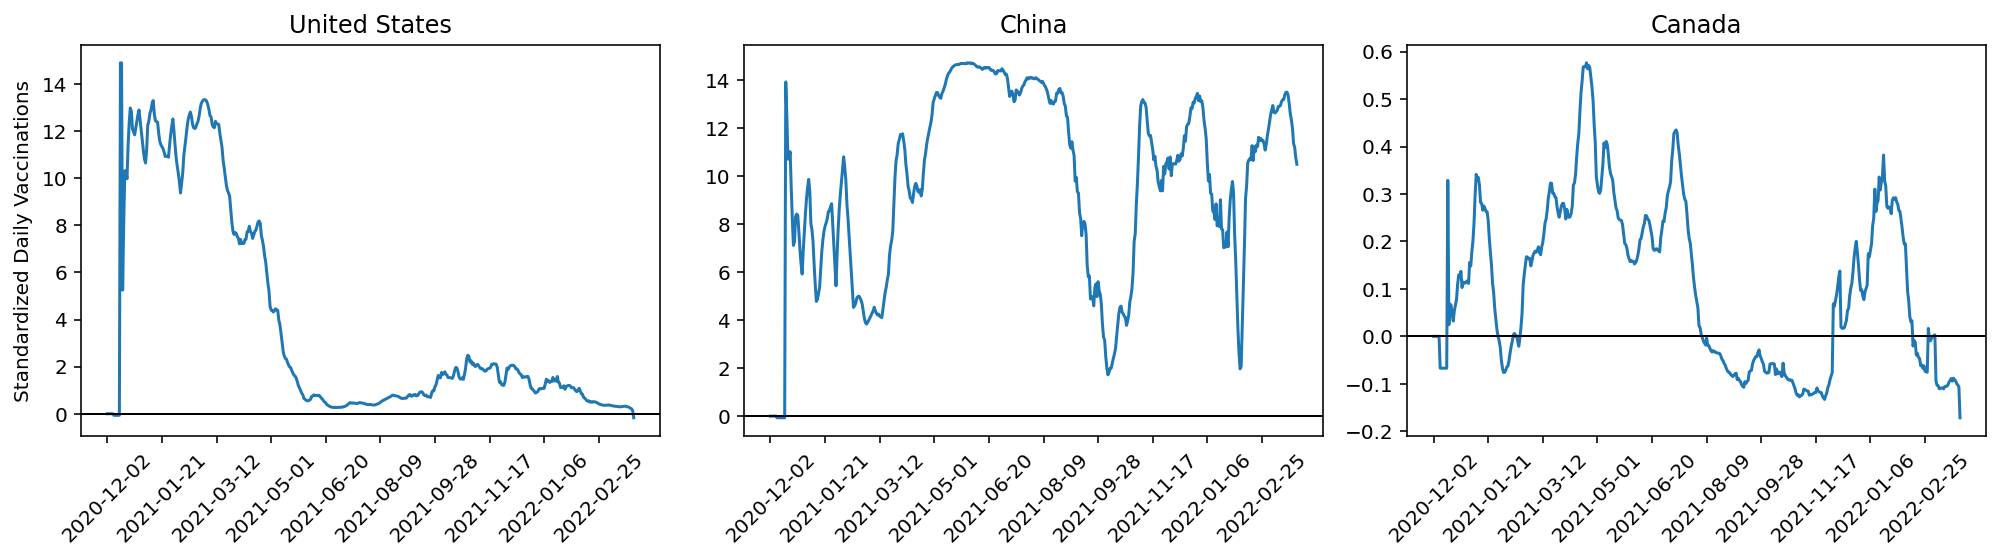

In [5]:
vaccination_std_matrix = StandardScaler().fit_transform(vaccinations_raw)
vaccination_df_std = pd.DataFrame(vaccination_std_matrix, columns = vaccinations_raw.columns, index=vaccinations_raw.index)
print(vaccination_std_matrix.shape)
print(" Mean and StD for Oth Day: [",  vaccination_std_matrix[:, 0].mean(),
      vaccination_std_matrix[:, 0].std(), "]")
print(" Mean and StD for 365th Day: [",  vaccination_std_matrix[:, 365].mean(),
      vaccination_std_matrix[:, 365].std(), "]")
print(" Mean and StD for 482nd Day: [",  vaccination_std_matrix[:, 482].mean(),
      vaccination_std_matrix[:, 482].std(), "]")

country_time_series_plot(dataset=vaccination_df_std, country_list=['United States', 'China', 'Canada'])


# Part 2: Applying PCA

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset by superimposing the cumulative explained variance to a scree plot. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? Write an expression for this. **[0.25]** **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first two PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

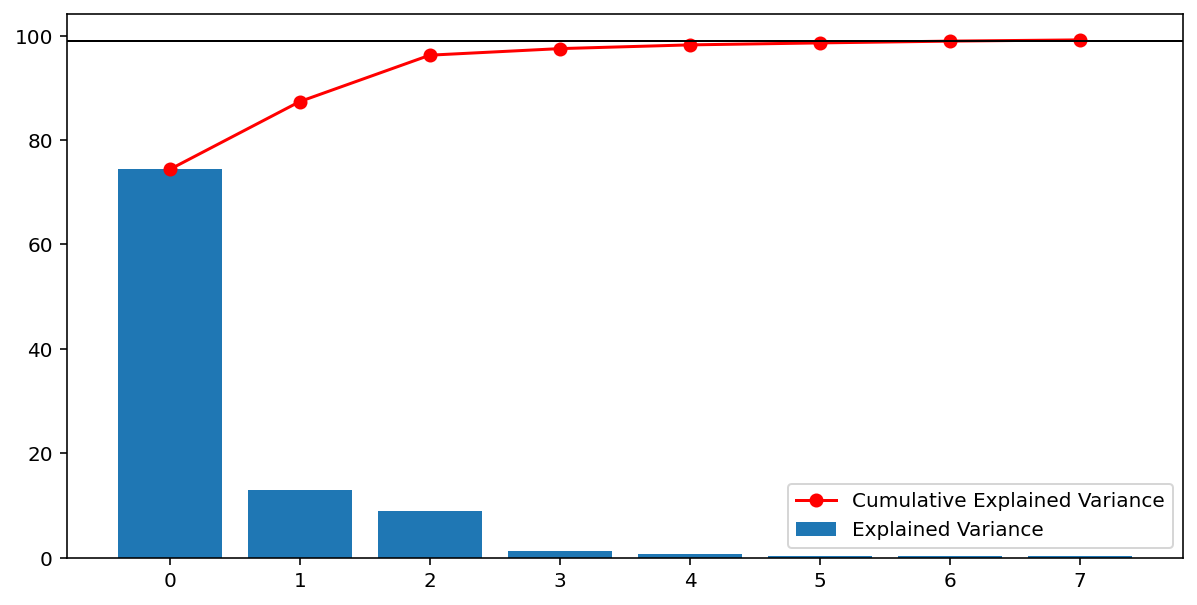

No. of PCs to cover 99% of the dataset's variance:  8


In [6]:
'''
Compute the covariance matrix of the dataframe.
'''
cov_matrix = np.cov(vaccination_df_std.T)

'''
Write a function get_sorted_eigen(df_cov) that gets the covariance matrix of
dataframe df (from step 1), and returns sorted eigenvalues and eigenvectors
using np.linalg.eigh
'''
def get_sorted_eigen(cov_matrix):
  w, v = np.linalg.eigh(cov_matrix)
  descending_eigens = (-w).argsort()
  w = w[descending_eigens]
  v = v[:, descending_eigens]
  return w,v

eigenval, eigenvec = get_sorted_eigen(cov_matrix)
np.argmax(eigenval)

eigenval_sum = sum(eigenval)
explained_var = [val/eigenval_sum*100 for val in eigenval]
cumulative_explained_var = np.cumsum(explained_var)
pc_99 = next(i for i,v in enumerate(cumulative_explained_var) if v >= 99)+1

'''
Show the effectiveness of your principal components in covering the variance of
the dataset by superimposing the cumulative explained variance to a scree plot
'''
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(range(pc_99), explained_var[0:pc_99], label='Explained Variance')
plt.plot(cumulative_explained_var[0:pc_99], 'r-o', label='Cumulative Explained Variance')
ax.axhline(y=99, xmin=0, xmax=1, color="black", linewidth=1)
plt.legend()
plt.show()

'''
How many PCs do you need to cover 99% of the dataset's variance? 
'''
print("No. of PCs to cover 99% of the dataset's variance: ", pc_99)

**Covering 99% Variance of the Dataset**

Given the eigenvalues, $$\Lambda = [\lambda_1 \: \lambda_2 \ldots \lambda_K]$$

we obtain the $i^{th}$ explained variance as 
$$ \sigma_i^2 = \frac{\lambda_i}{∑_{i=1}^K\lambda_k} \times 100$$

To cover $99\%$ variance of the dataset, we find the minimum $N$ for which, 

$$\sum_{i=1}^N \sigma^2_i \geq 99$$ 



In [7]:
'''
Plot the first 16 principal components (Eigenvectors) as a time series
'''

def vaccination_pca_time_series_plot(dataset=None, pc_count=0):
  max_column_plot = 4
  num_plots = pc_count
  cols = max_column_plot
  rows = int(np.ceil(num_plots / cols))
  plot_loc = range(1, num_plots+1)
  fig = plt.figure(figsize=(15,15))
  for i in range(num_plots):
    data = dataset.loc[i][:]
    ax = fig.add_subplot(rows,cols, plot_loc[i])
    ax.plot(data)
    ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
    ax.set_xticks(data.index[::50]);
    plt.xticks(rotation=45)
    # plt.ticklabel_format(axis='y', style='sci', scilimits=(0,1000))
    plt.title("PC Element "+str(i+1), size=12)
    if i % cols == 0:
      plt.ylabel('PC Value', size=10);

  fig.tight_layout()

### PC Plots and Inference 
The plots show the contribution of each feature for a given principal component. For PC1 and PC2, a general trend can be noticed whereas from PC4 the details become increasingly granular.  In essence, these plots tell how each feature (i.e date)  contribute to capturing the variance of the dataset. The general trend in PC1 as seen in the first plot below is able to capture ~75% variance. Adding PC2 scaled by its eigen value would increase the captured variance to 90%. The observation is analogous to Fourier decomposition.  

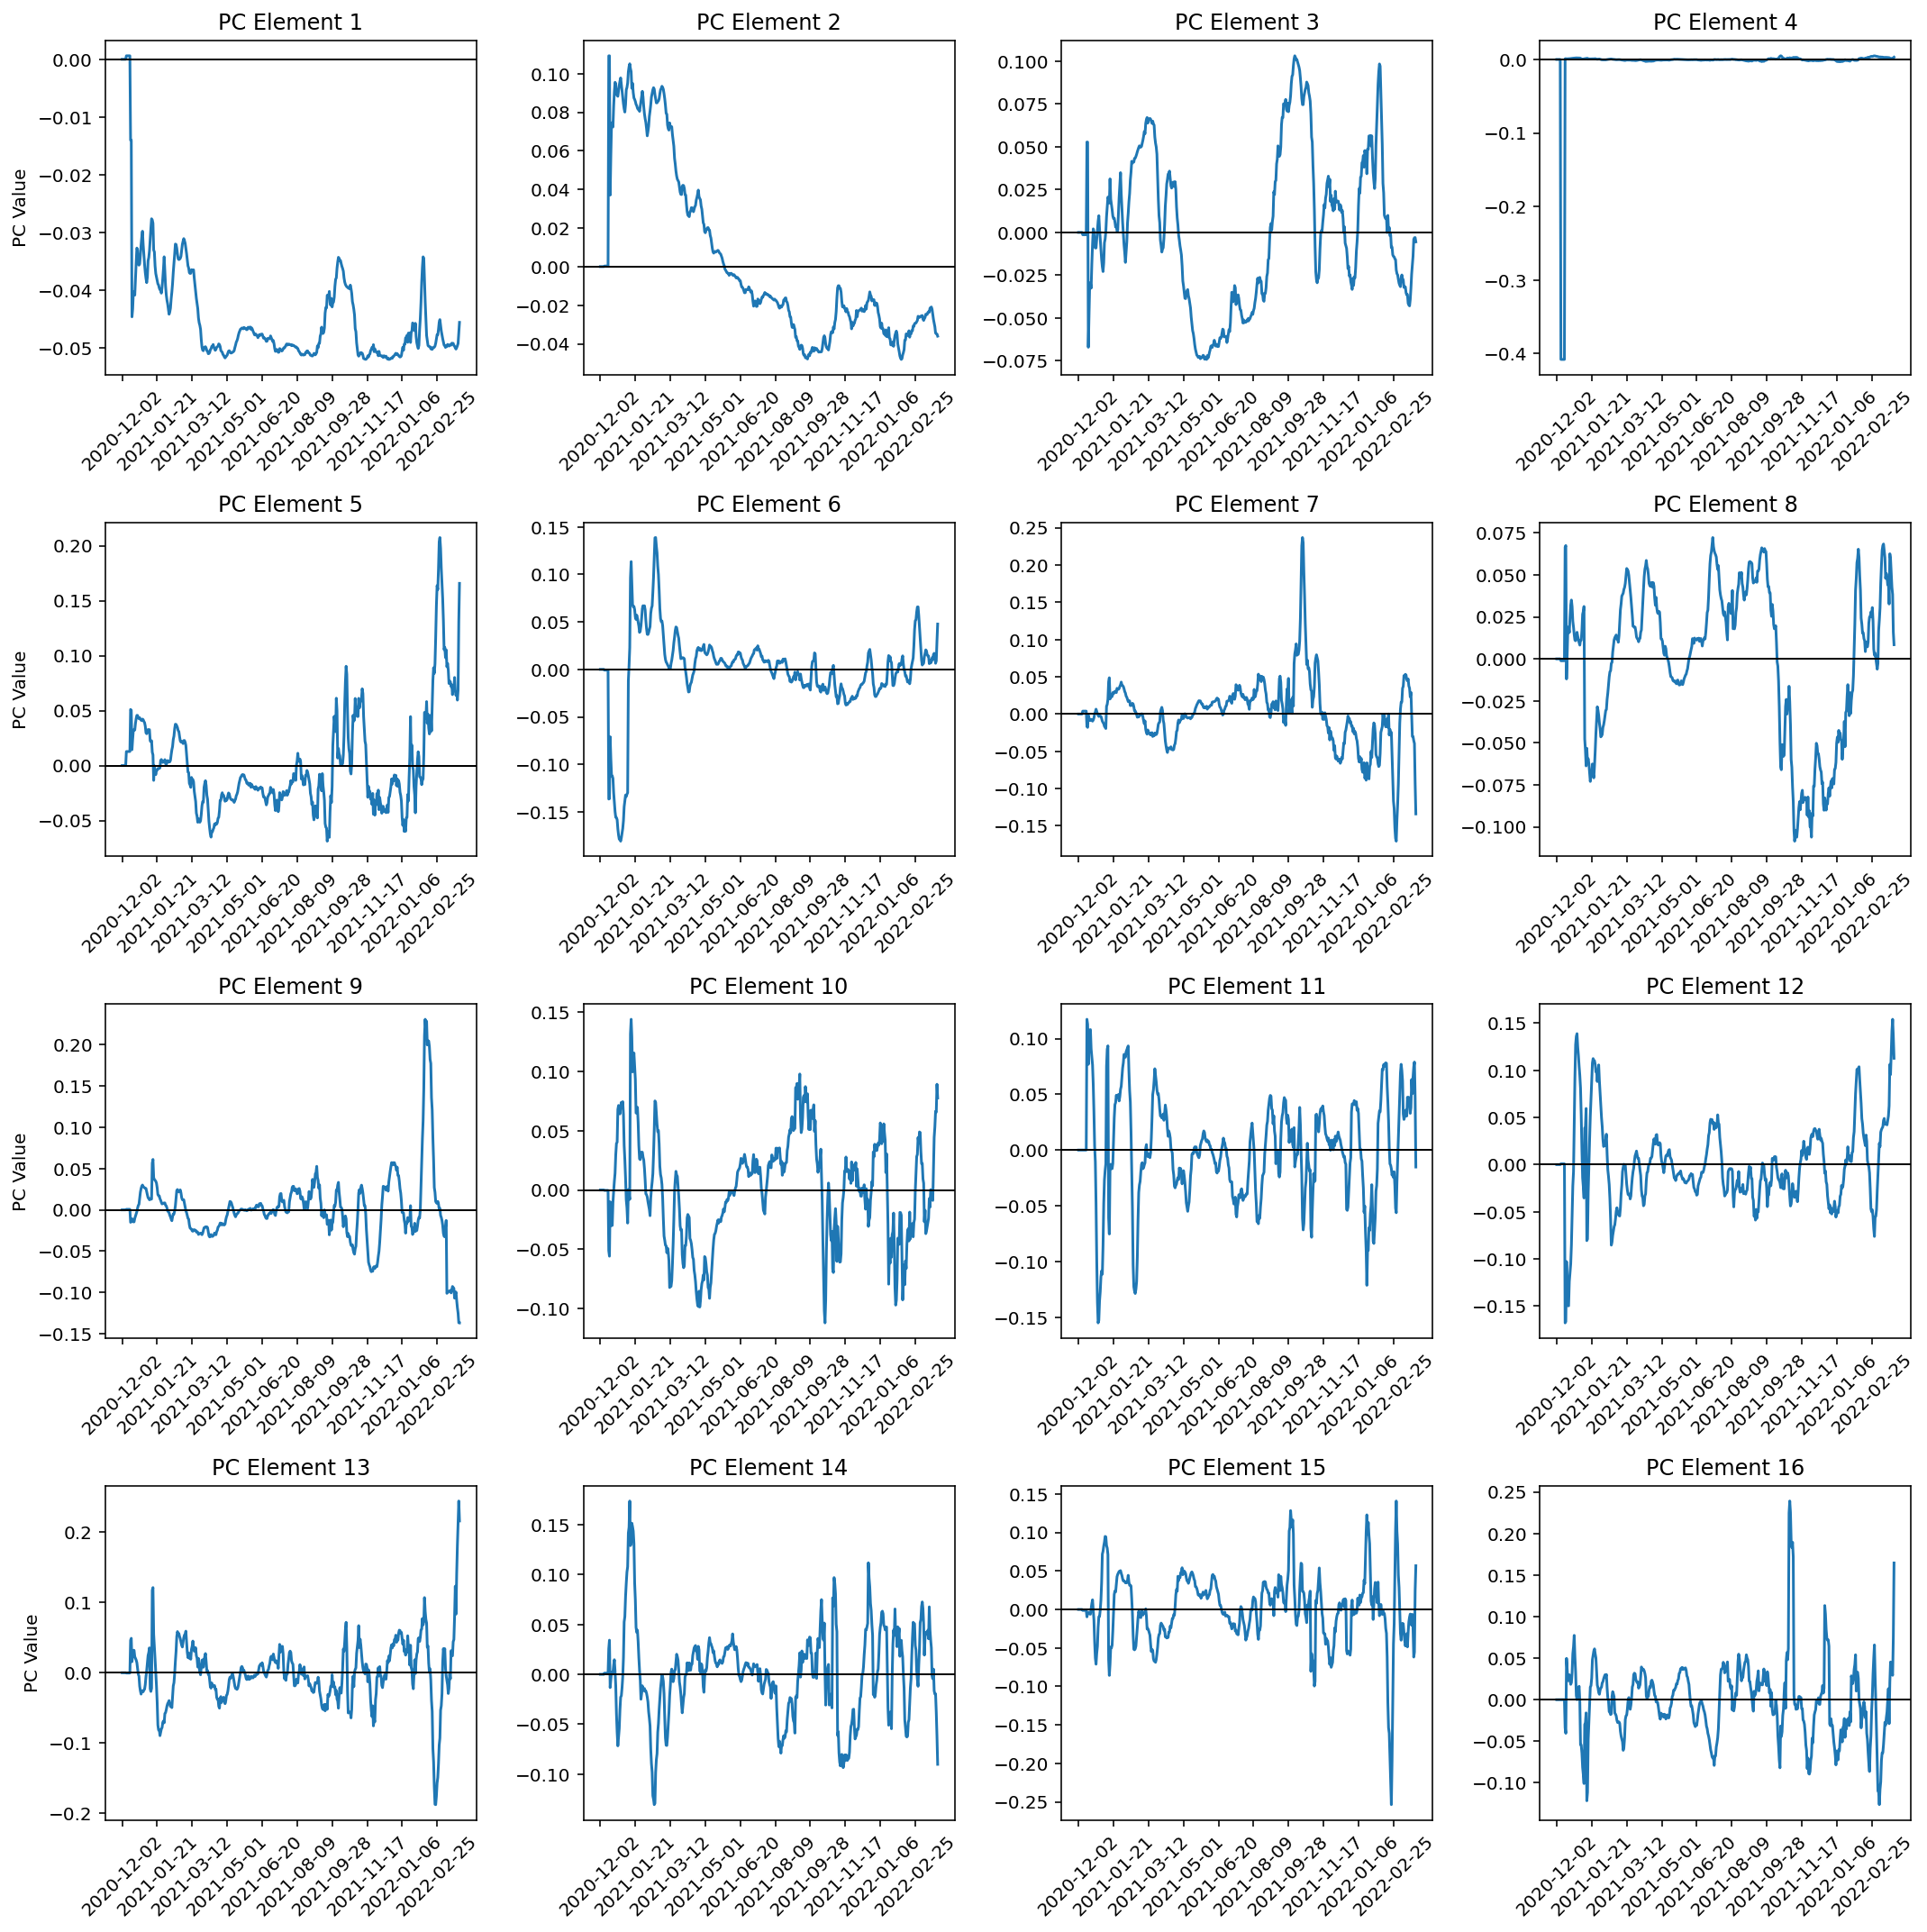

In [8]:
pc_count = 16
principal_comp = eigenvec[:,0:pc_count]
vaccination_principal_comp_df = pd.DataFrame(principal_comp.T, columns = vaccinations_raw.columns)
vaccination_pca_time_series_plot(dataset=vaccination_principal_comp_df, pc_count=pc_count)

# Part 3: Data reconstruction

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigenvectors and eigenvalues. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `United States`, `Canada`, and `China` as inputs. **[0.5]**


In [9]:
def plot_country_figures_pca(original_df, country_name, dataset_name):

  country_idx = original_df.index.get_indexer([country_name])
  scaler = StandardScaler()
  scaler.fit(original_df)
  datamatrix_std = scaler.fit_transform(original_df)
  df_std = pd.DataFrame(datamatrix_std, columns = original_df.columns, index=original_df.index)

  cov_matrix = np.cov(df_std.T)
  eigenval, eigenvec = get_sorted_eigen(cov_matrix)
  pc_counts = None
  pc_counts = [2, 4, 8, 16, 32]
  # pc_counts = [32]

  rmse = np.zeros(len(pc_counts))
  fig = plt.figure(figsize=(12,8))
  fig.suptitle(country_name, fontweight='bold', size=16)

  label_fontsize = 12

  # Plotting Original Data
  ax = fig.add_subplot(2,2,1)
  plot_data = original_df.loc[country_name][:]
  ax.plot(plot_data, label="Original")
  plt.legend(loc='upper left')
  ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
  ax.set_xticks(plot_data.index[::50]);
  plt.xticks(rotation=30)
  plt.ylabel(dataset_name, size=label_fontsize);

  # Plotting Incremental Reconstruction 
  ax = fig.add_subplot(2,2,2)
  cmap = plt.get_cmap("Dark2")
  # ax.plot(plot_data, label="original")
  for idx,pc_count in enumerate(pc_counts):
    projection_pcs = eigenvec[:, 0:pc_count]
    projected_data = np.dot(datamatrix_std, projection_pcs)
    reconstructed_data = np.dot(projected_data, projection_pcs.T)
    reconstructed_data_rescaled = scaler.inverse_transform(reconstructed_data)
    df_reconstructed = pd.DataFrame(reconstructed_data_rescaled, columns = original_df.columns, index=original_df.index)
    plot_data = df_reconstructed.loc[country_name][:]
    residual_error = original_df.loc[country_name][:] - df_reconstructed.loc[country_name][:]
    rmse[idx] = np.sqrt(np.dot(residual_error.values.T, residual_error.values)/len(residual_error.values))
    ax.plot(plot_data, label=str(pc_count)+"PC", color=cmap(idx))
  ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
  ax.set_xticks(plot_data.index[::50]);
  plt.xticks(rotation=45)
  plt.ylabel(dataset_name, size=label_fontsize);
  plt.legend(loc='upper left')

  # Plotting Residual Errors
  ax = fig.add_subplot(2,2,3)
  residual_error = original_df.loc[country_name][:] - df_reconstructed.loc[country_name][:]
  ax.plot(residual_error, label=str(pc_count)+"PC")
  ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
  ax.set_xticks(plot_data.index[::50]);
  plt.xticks(rotation=45)
  # plt.xlabel('Date', size=label_fontsize);
  plt.ylabel('Residual Error', size=label_fontsize);

  # Plotting RSME
  ax = fig.add_subplot(2,2,4)
  ax.plot(pc_counts, rmse, '-o')
  plt.ylabel('RMSE', size=label_fontsize);
  plt.xlabel('PC Components', size=label_fontsize);

  fig.tight_layout()
  fig.subplots_adjust(wspace=0.3)
  fig.subplots_adjust(top=0.92)

  return rmse


### PCA using Eigendecomposition for United States, Canada and China 

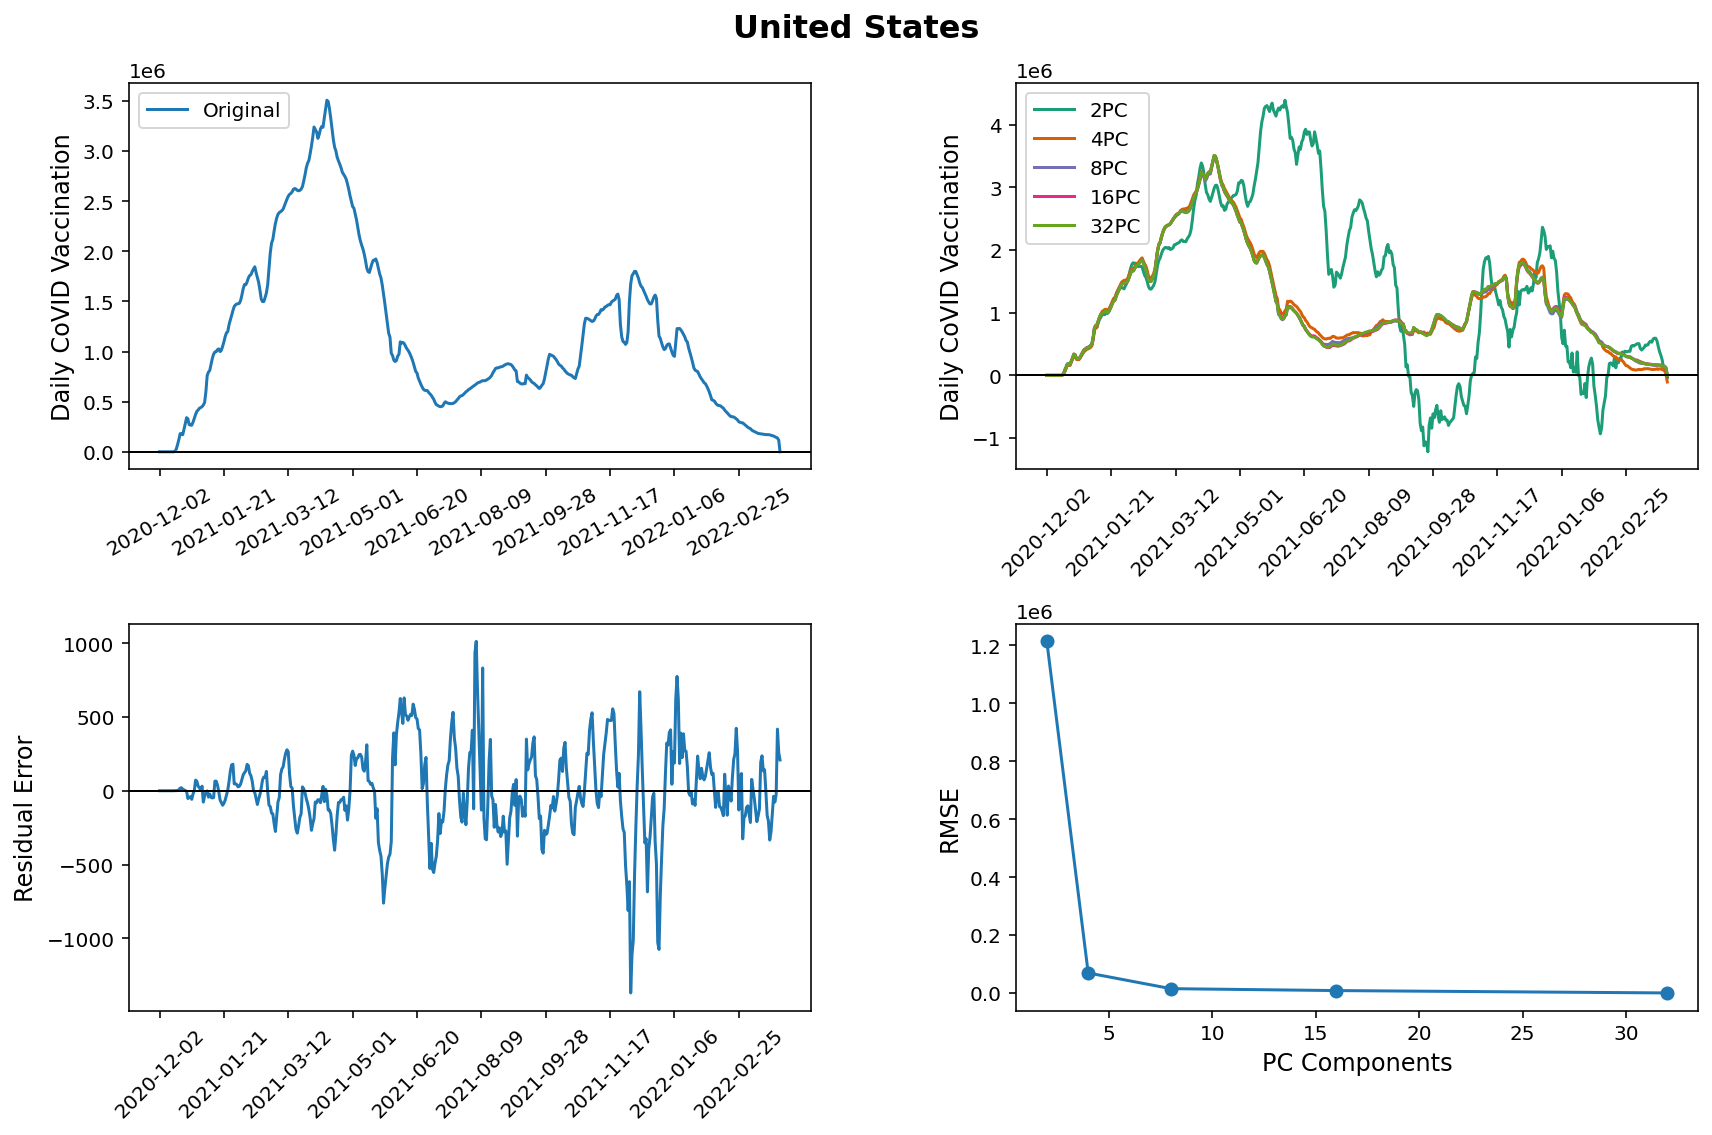

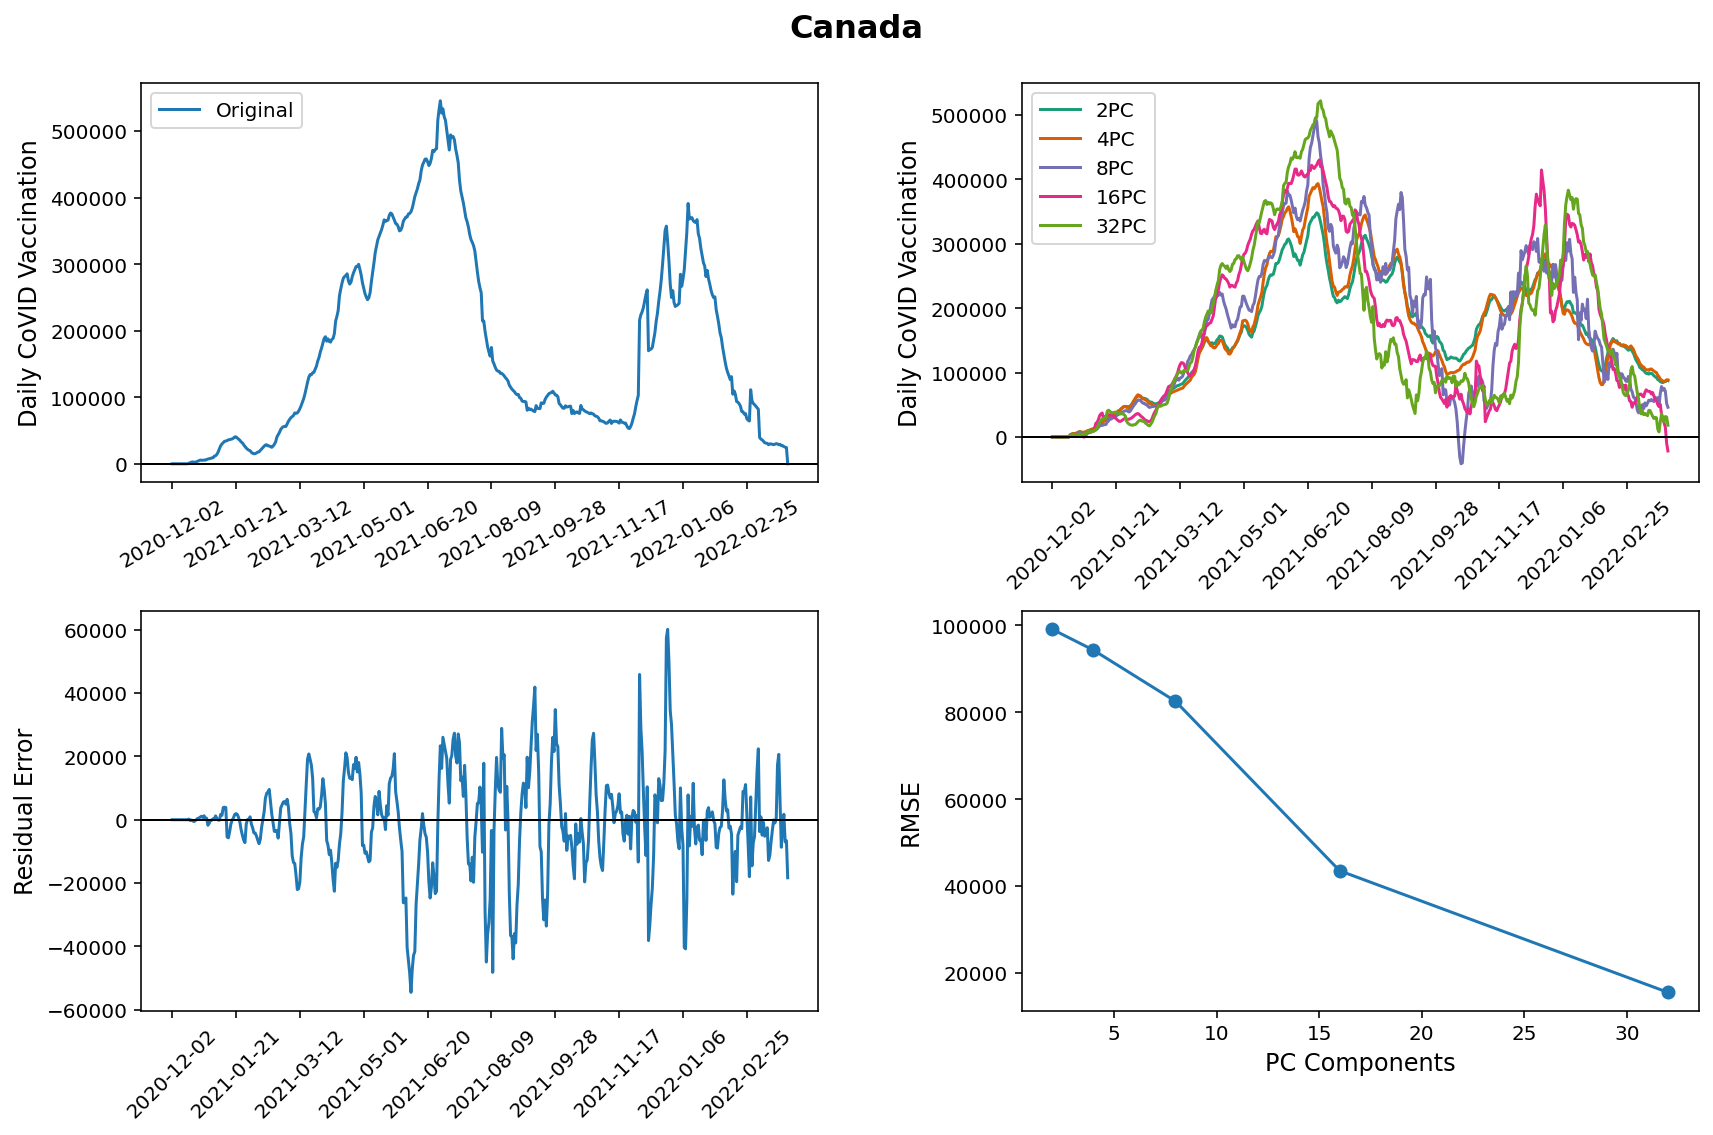

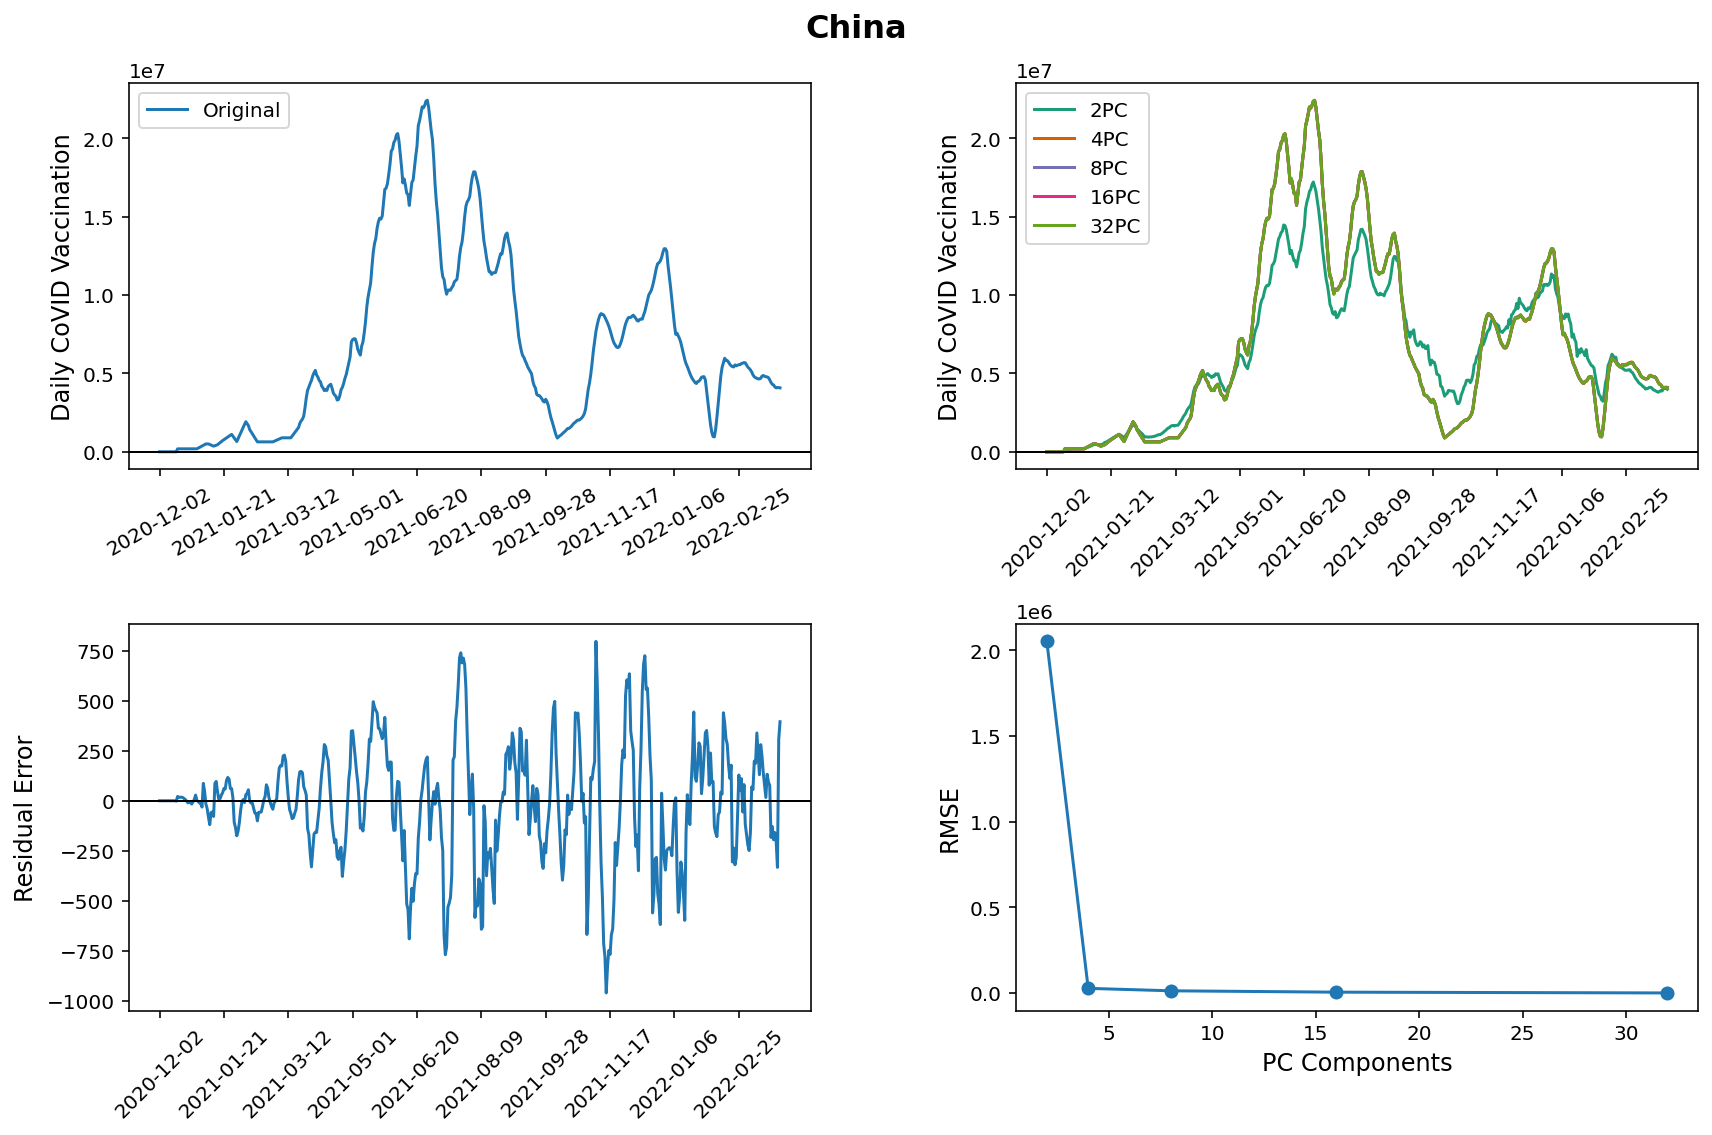

In [10]:
rmse_us_pca = plot_country_figures_pca(original_df=vaccinations_raw,
                                       country_name='United States',
                                       dataset_name='Daily CoVID Vaccination')
rmse_cd_pca = plot_country_figures_pca(original_df=vaccinations_raw,
                                       country_name='Canada',
                                       dataset_name='Daily CoVID Vaccination')
rmse_ch_pca = plot_country_figures_pca(original_df=vaccinations_raw,
                                       country_name='China',
                                       dataset_name='Daily CoVID Vaccination')

rmse_pca = [rmse_us_pca, rmse_cd_pca, rmse_ch_pca]

# Part 4: SVD 
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. Write a function to make this comparison **[0.5]**, and comment on the results. **[0.5]**.

In [11]:
def get_dataset_svd(pandas_data):
  dataset = pandas_data.values
  u, s, vT = np.linalg.svd(dataset)
  U_sigma = np.dot(u, np.diag(s))
  return u, s, vT

In [12]:
def plot_country_figures_svd(original_df, country_name, dataset_name, standardize=False):

  country_idx = original_df.index.get_indexer([country_name])
  _, _, vT = get_dataset_svd(original_df)
  pc_counts = None
  pc_counts = [2, 4, 8, 16, 32]

  if standardize:
    scaler = StandardScaler()
    scaler.fit(original_df)
    datamatrix_std = scaler.fit_transform(original_df)
    df_std =  pd.DataFrame(datamatrix_std, columns = original_df.columns, index=original_df.index)
    _, _, vT = get_dataset_svd(df_std)

  rmse = np.zeros(len(pc_counts))
  fig = plt.figure(figsize=(12,8))
  fig.suptitle(country_name, fontweight='bold', size=16)

  label_fontsize = 12

  # Plotting Original Data
  ax = fig.add_subplot(2,2,1)
  plot_data = original_df.loc[country_name][:]
  ax.plot(plot_data, label="Original")
  plt.legend(loc='upper left')
  ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
  ax.set_xticks(plot_data.index[::50]);
  plt.xticks(rotation=30)
  plt.ylabel(dataset_name, size=label_fontsize);

  # Plotting Incremental Reconstruction 
  ax = fig.add_subplot(2,2,2)
  cmap = plt.get_cmap("Dark2")
  # ax.plot(plot_data, label="original")
  for idx,pc_count in enumerate(pc_counts):
    projection_pcs = vT[0:pc_count,:].T
    projected_data = np.dot(original_df.values, projection_pcs)
    reconstructed_data = np.dot(projected_data, projection_pcs.T)
    df_reconstructed = pd.DataFrame(reconstructed_data, columns = original_df.columns, index=original_df.index)
    if standardize:
      projected_data = np.dot(df_std.values, projection_pcs)
      reconstructed_data = np.dot(projected_data, projection_pcs.T)
      reconstructed_data_rescaled = scaler.inverse_transform(reconstructed_data)
      df_reconstructed = pd.DataFrame(reconstructed_data_rescaled, columns = original_df.columns, index=original_df.index)
    plot_data = df_reconstructed.loc[country_name][:]
    residual_error = original_df.loc[country_name][:] - df_reconstructed.loc[country_name][:]
    rmse[idx] = np.sqrt(np.dot(residual_error.values.T, residual_error.values)/len(residual_error.values))
    ax.plot(plot_data, label=str(pc_count)+"PC", color=cmap(idx))
  ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
  ax.set_xticks(plot_data.index[::50]);
  plt.xticks(rotation=45)
  # plt.xlabel('Date', size=label_fontsize);
  plt.ylabel(dataset_name, size=label_fontsize);
  plt.legend(loc='upper left')

  # Plotting Residual Errors
  ax = fig.add_subplot(2,2,3)
  residual_error = original_df.loc[country_name][:] - df_reconstructed.loc[country_name][:]
  ax.plot(residual_error, label=str(pc_count)+"PC")
  ax.axhline(y=0, xmin=0, xmax=1, color="black", linewidth=1)
  ax.set_xticks(plot_data.index[::50]);
  plt.xticks(rotation=45)
  # plt.xlabel('Date', size=label_fontsize);
  plt.ylabel('Residual Error', size=label_fontsize);

  # Plotting RSME
  ax = fig.add_subplot(2,2,4)
  ax.plot(pc_counts, rmse, '-o')
  plt.ylabel('RMSE', size=label_fontsize);
  plt.xlabel('PC Components', size=label_fontsize);

  fig.tight_layout()
  fig.subplots_adjust(wspace=0.3)
  fig.subplots_adjust(top=0.92)

  return rmse

### PCA using SVD for United States, Canada and China (No Standardization)

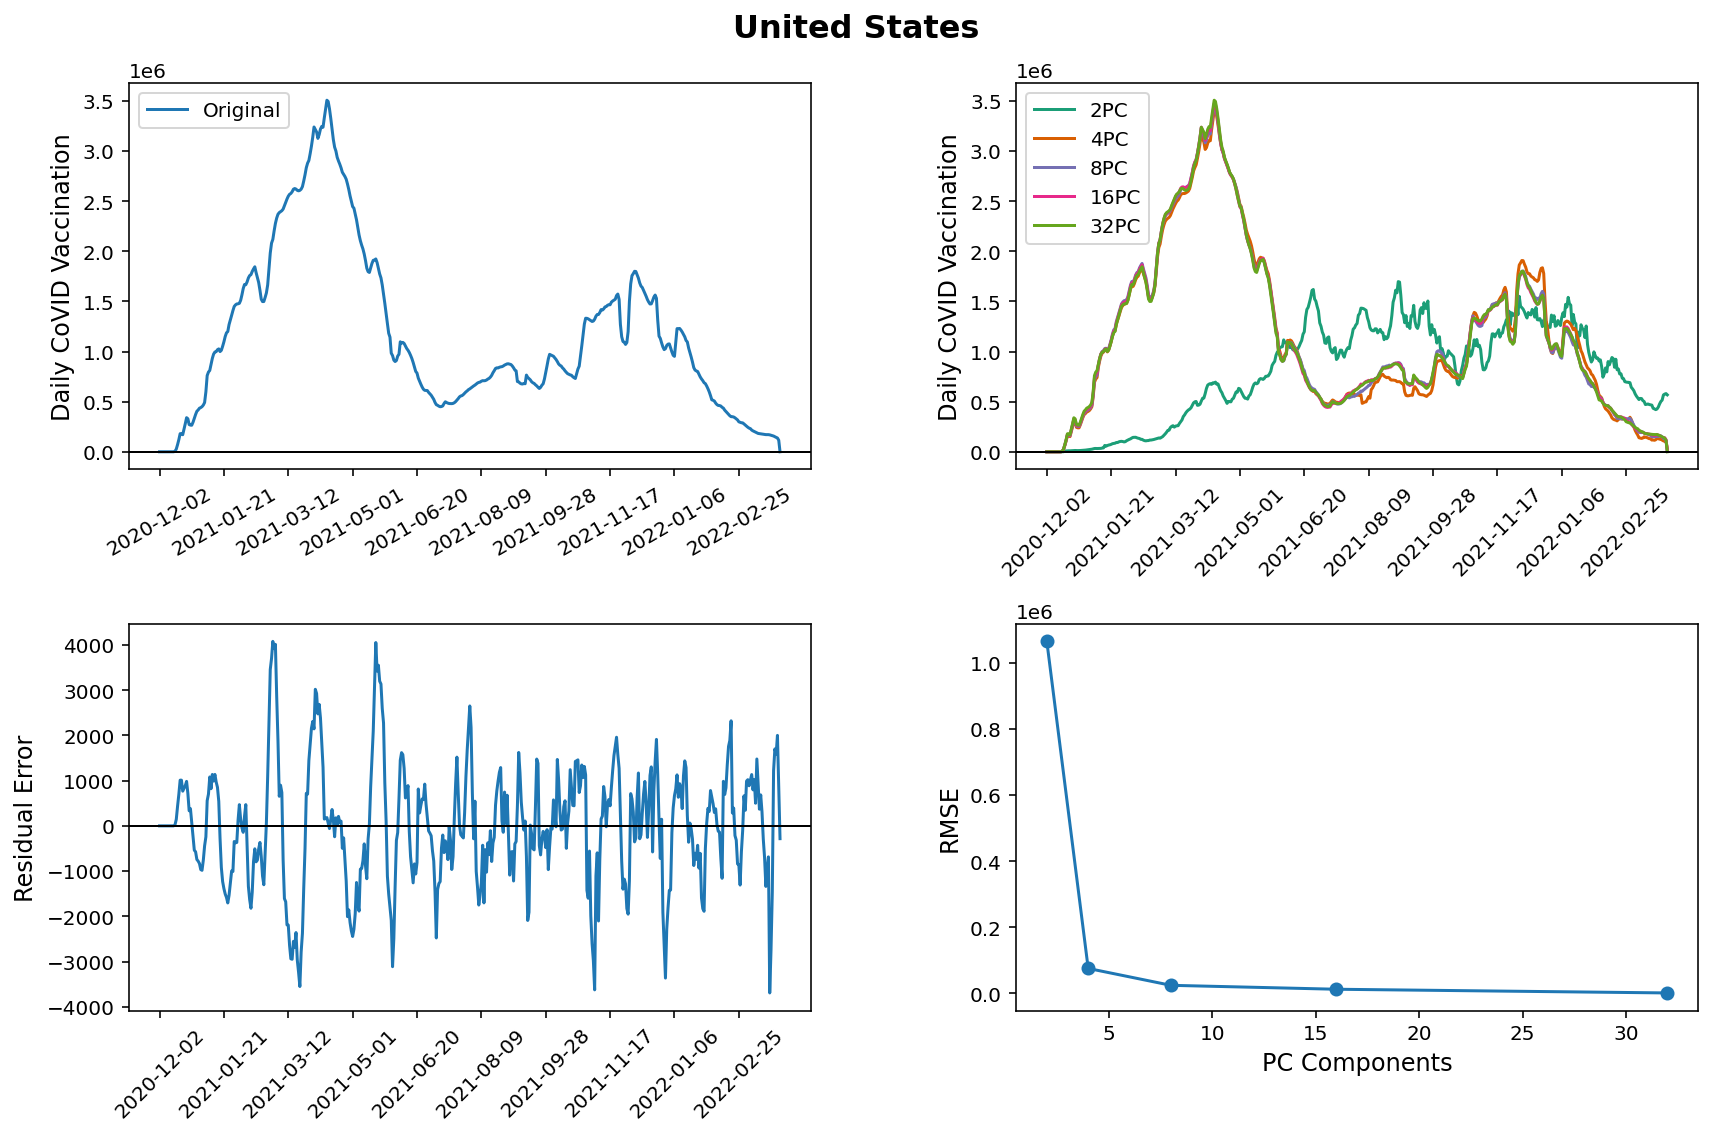

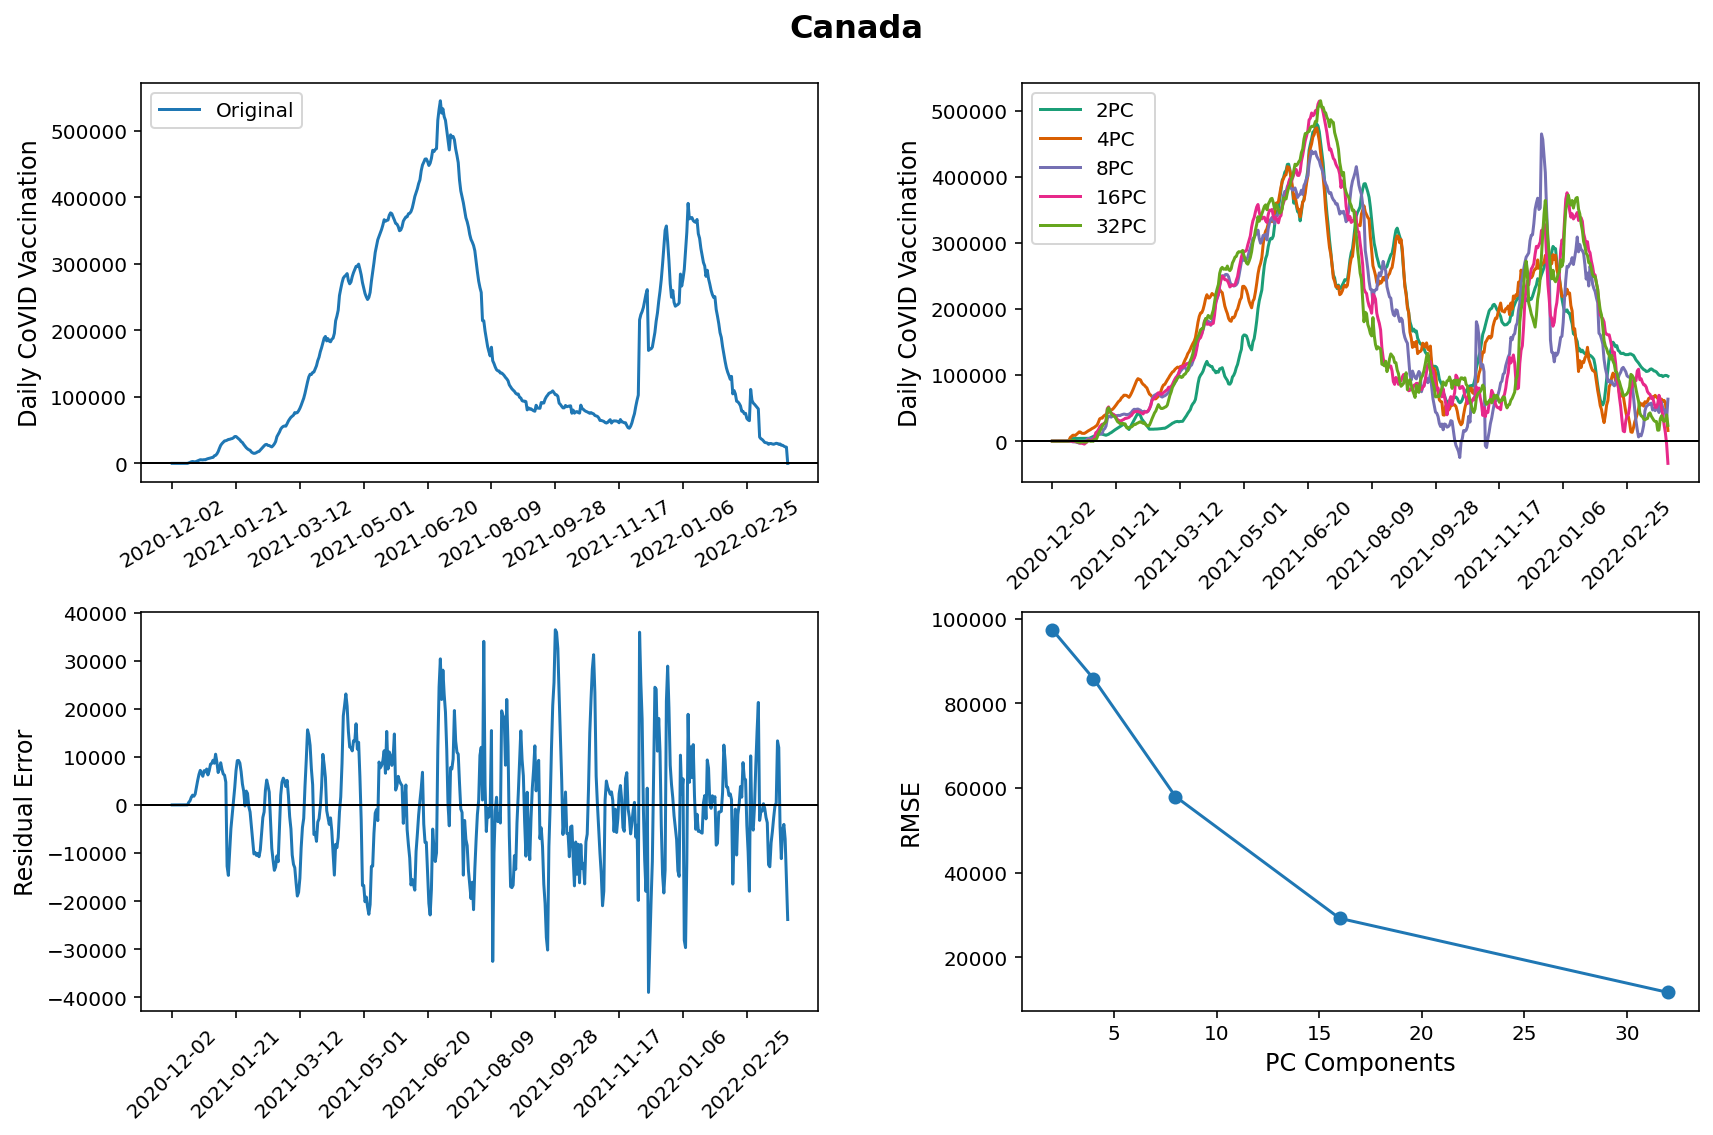

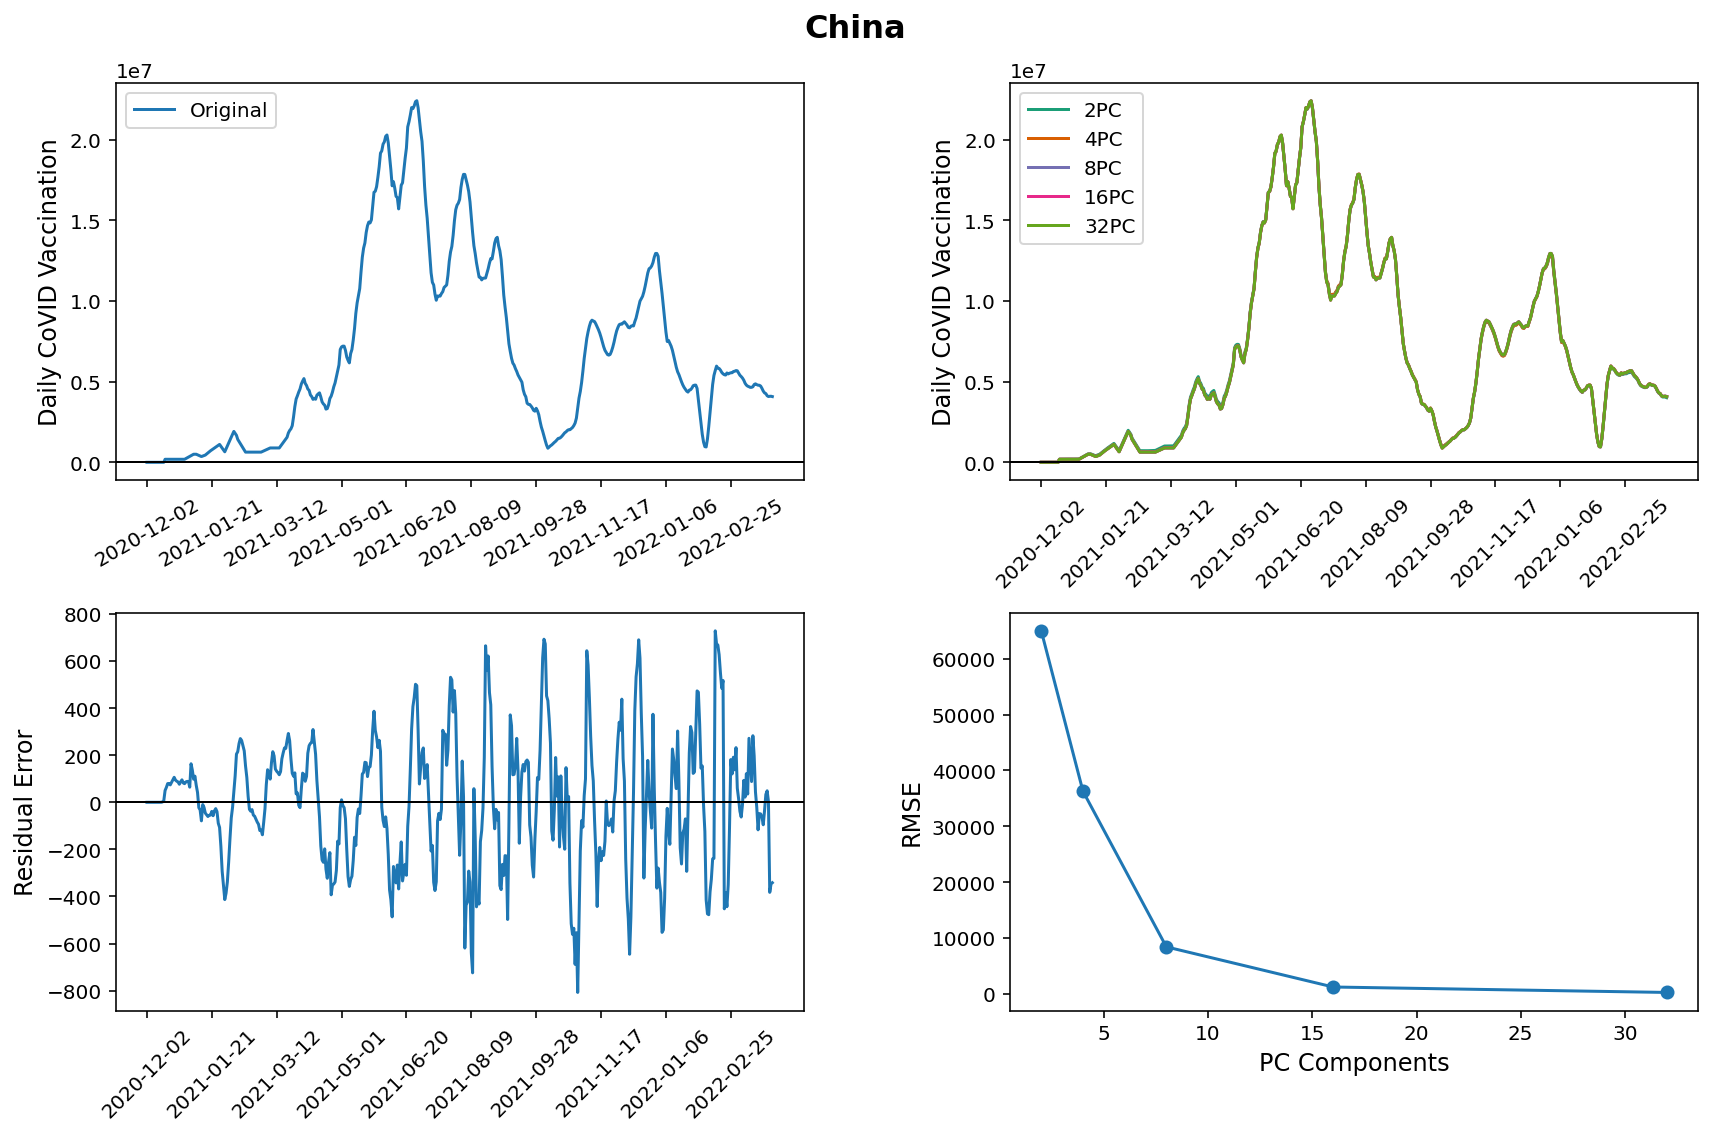

In [13]:
rmse_us_svd = plot_country_figures_svd(original_df=vaccinations_raw,
                                   country_name='United States',
                                   dataset_name='Daily CoVID Vaccination',
                                   standardize=False)
rmse_cd_svd = plot_country_figures_svd(original_df=vaccinations_raw, 
                                   country_name='Canada',
                                   dataset_name='Daily CoVID Vaccination',
                                   standardize=False)
rmse_ch_svd = plot_country_figures_svd(original_df=vaccinations_raw,
                                   country_name='China',
                                   dataset_name='Daily CoVID Vaccination',
                                   standardize=False)

rmse_svd = [rmse_us_svd, rmse_cd_svd, rmse_ch_svd]


### PCA using SVD for United States, Canada and China (with Standardization)

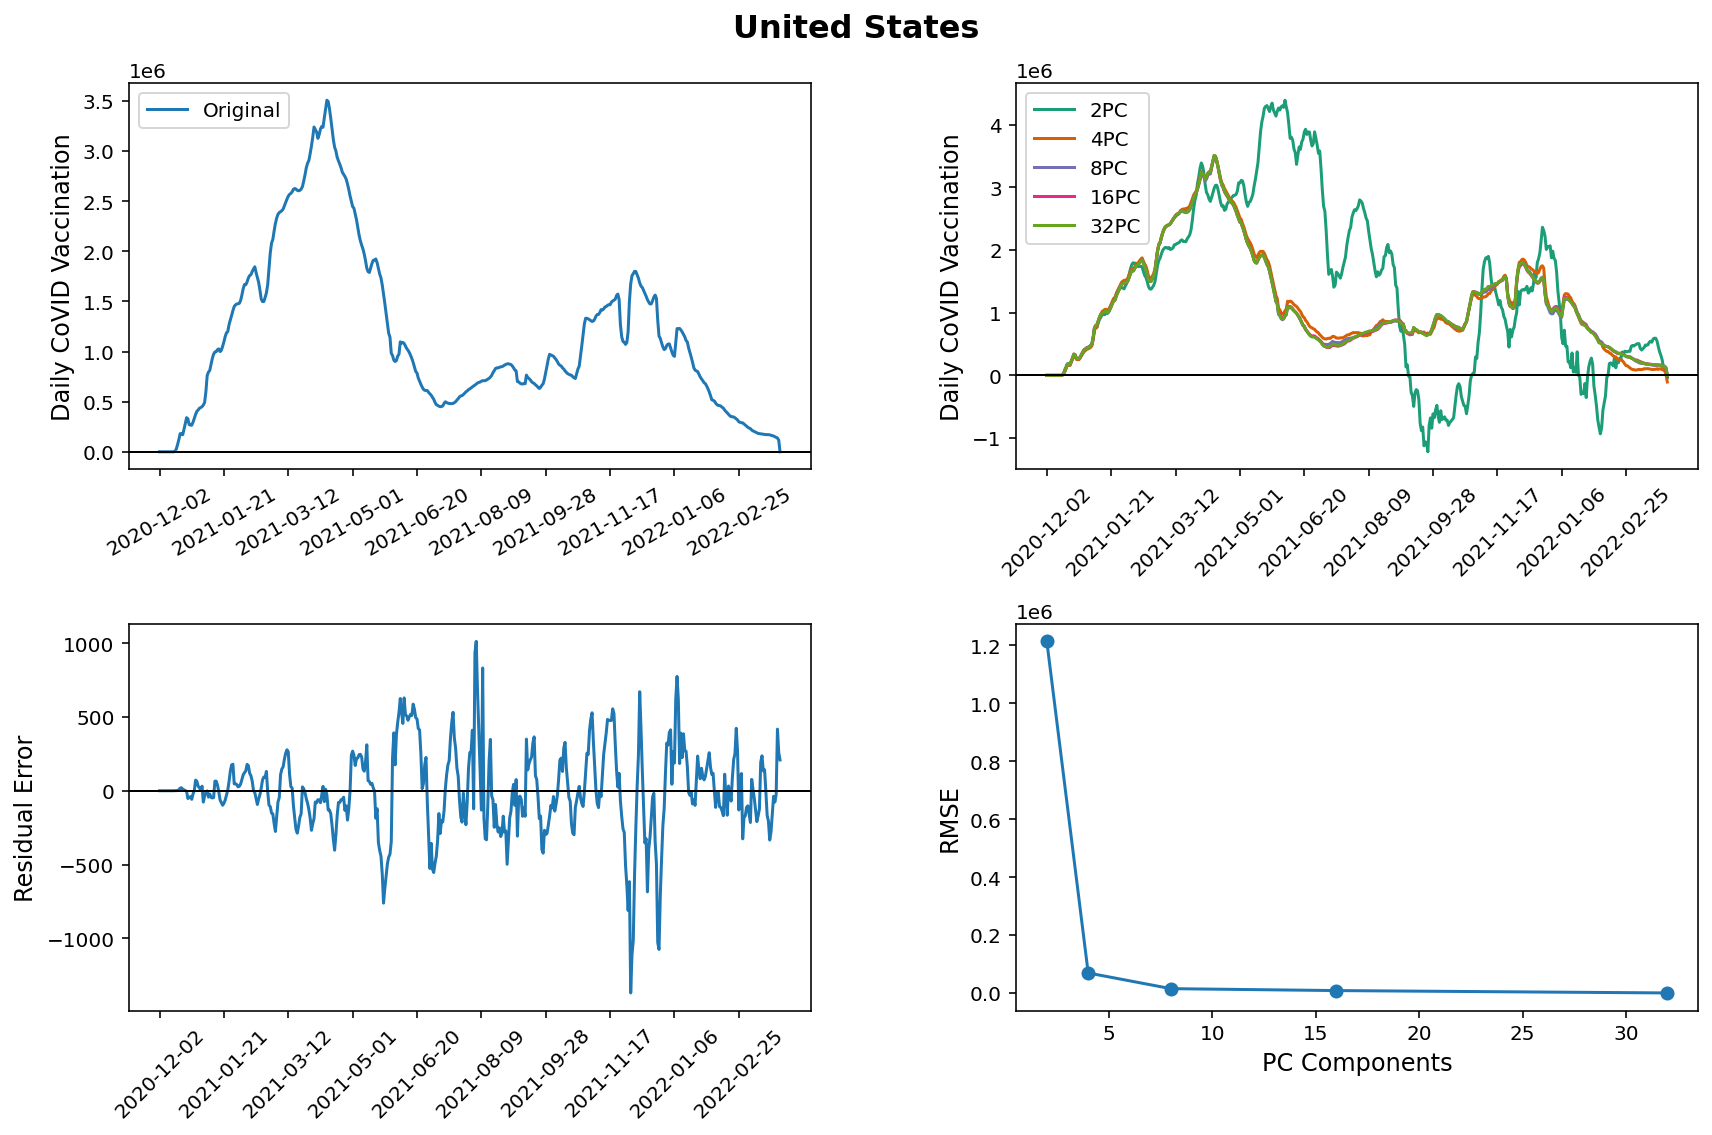

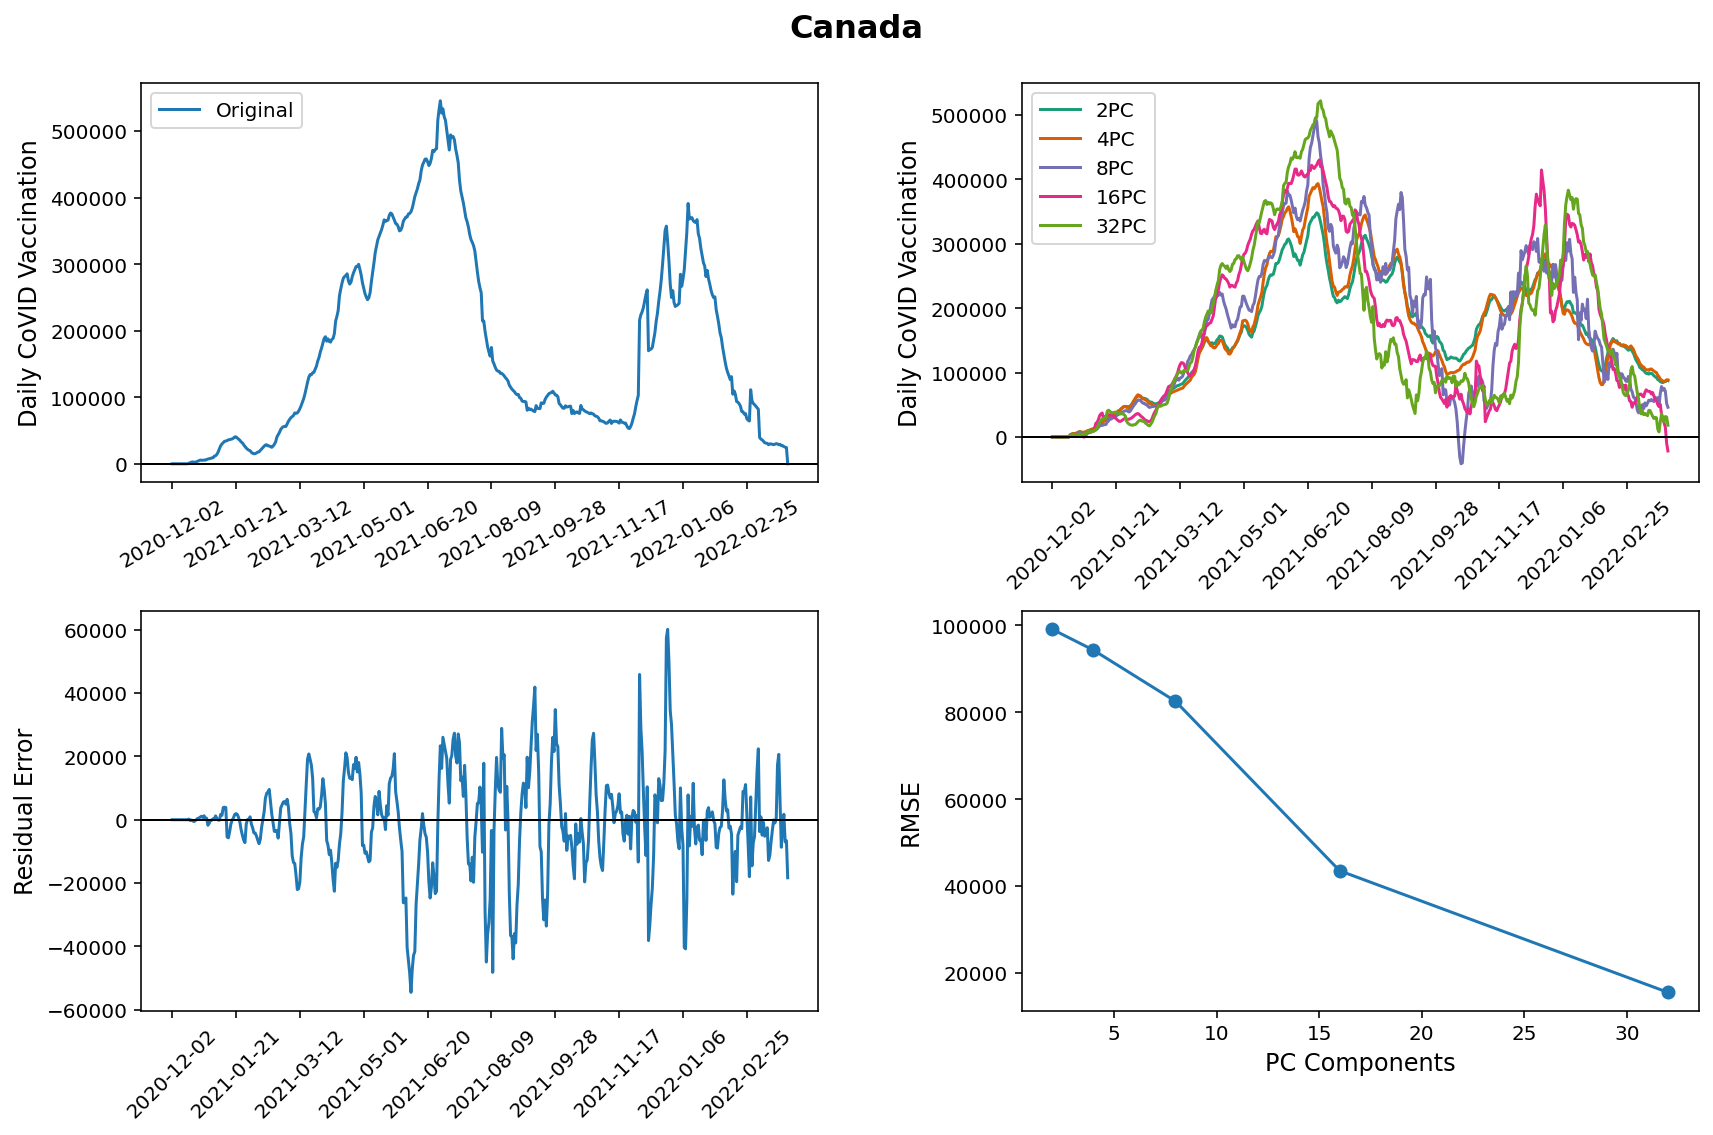

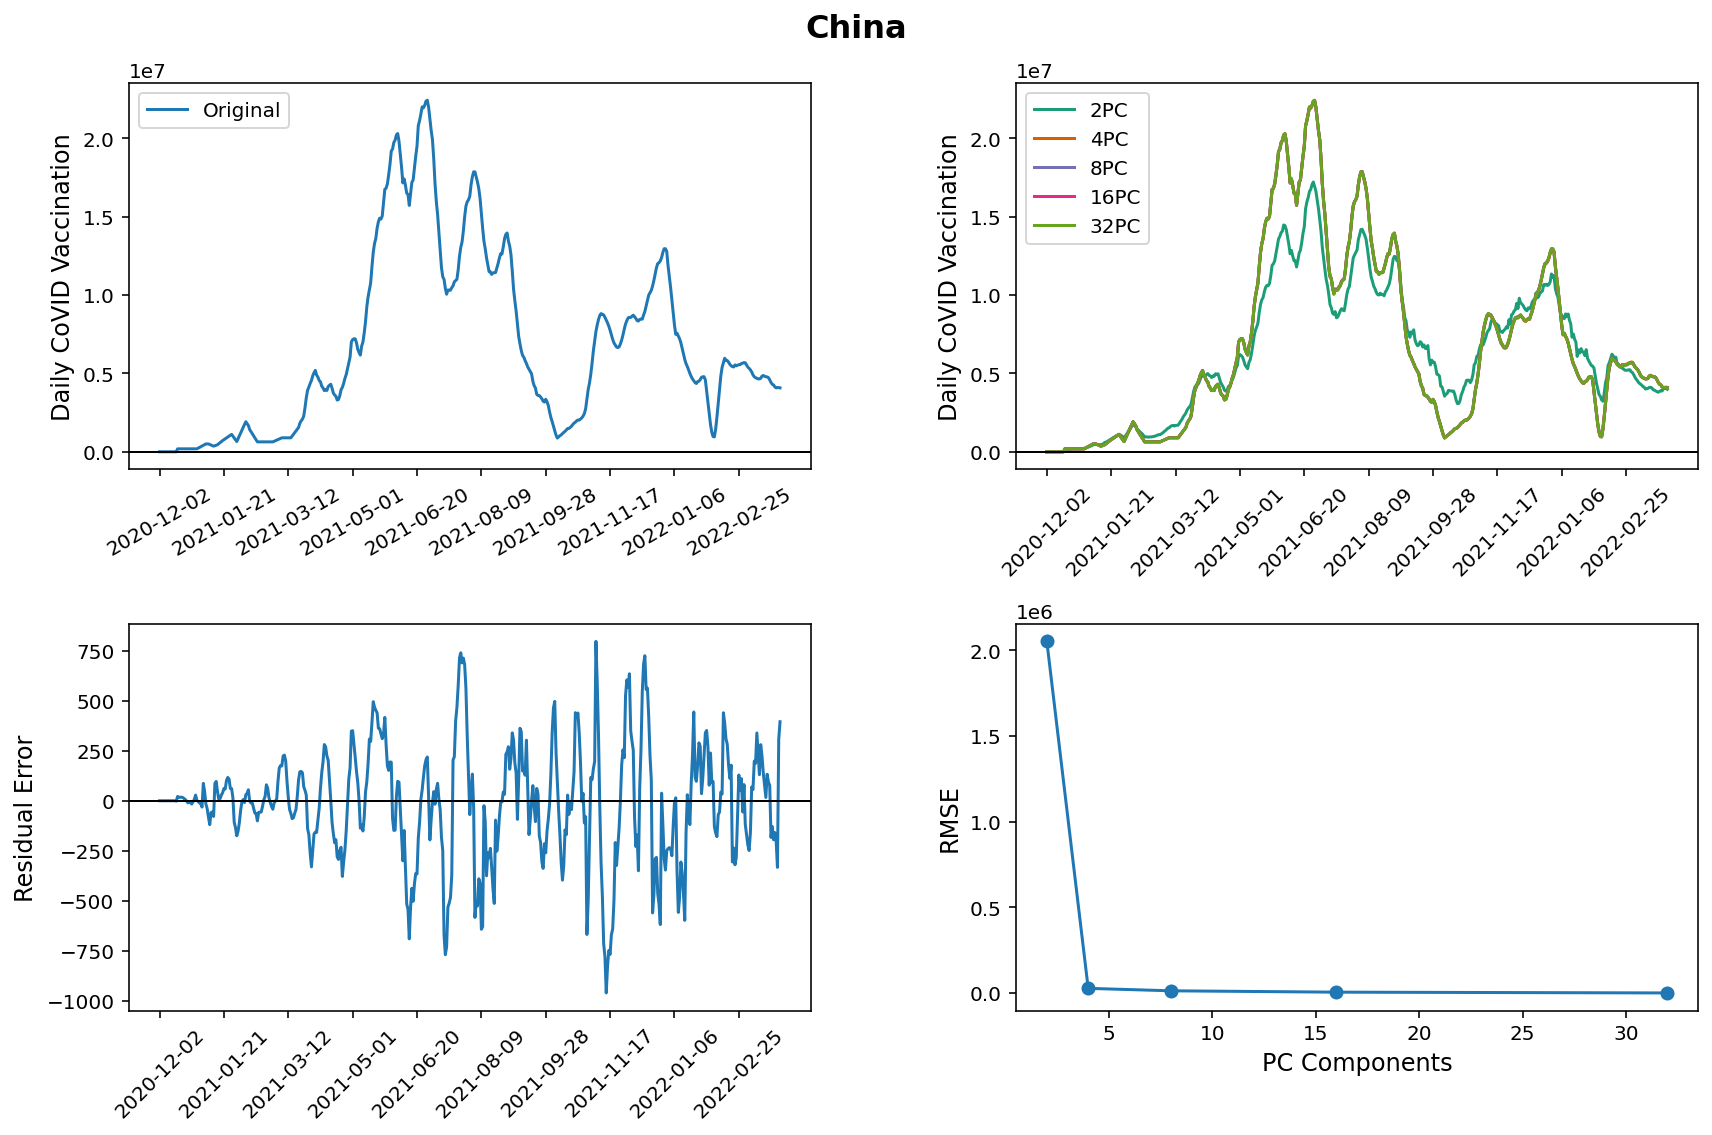

In [14]:
rmse_us_svd_standardized = plot_country_figures_svd(original_df=vaccinations_raw,
                                   country_name='United States',
                                   dataset_name='Daily CoVID Vaccination',
                                   standardize=True)
rmse_cd_svd_standardized = plot_country_figures_svd(original_df=vaccinations_raw, 
                                   country_name='Canada',
                                   dataset_name='Daily CoVID Vaccination',
                                   standardize=True)
rmse_ch_svd_standardized = plot_country_figures_svd(original_df=vaccinations_raw,
                                   country_name='China',
                                   dataset_name='Daily CoVID Vaccination',
                                   standardize=True)

rmse_svd_standardized = [rmse_us_svd_standardized, rmse_cd_svd_standardized, rmse_ch_svd_standardized]

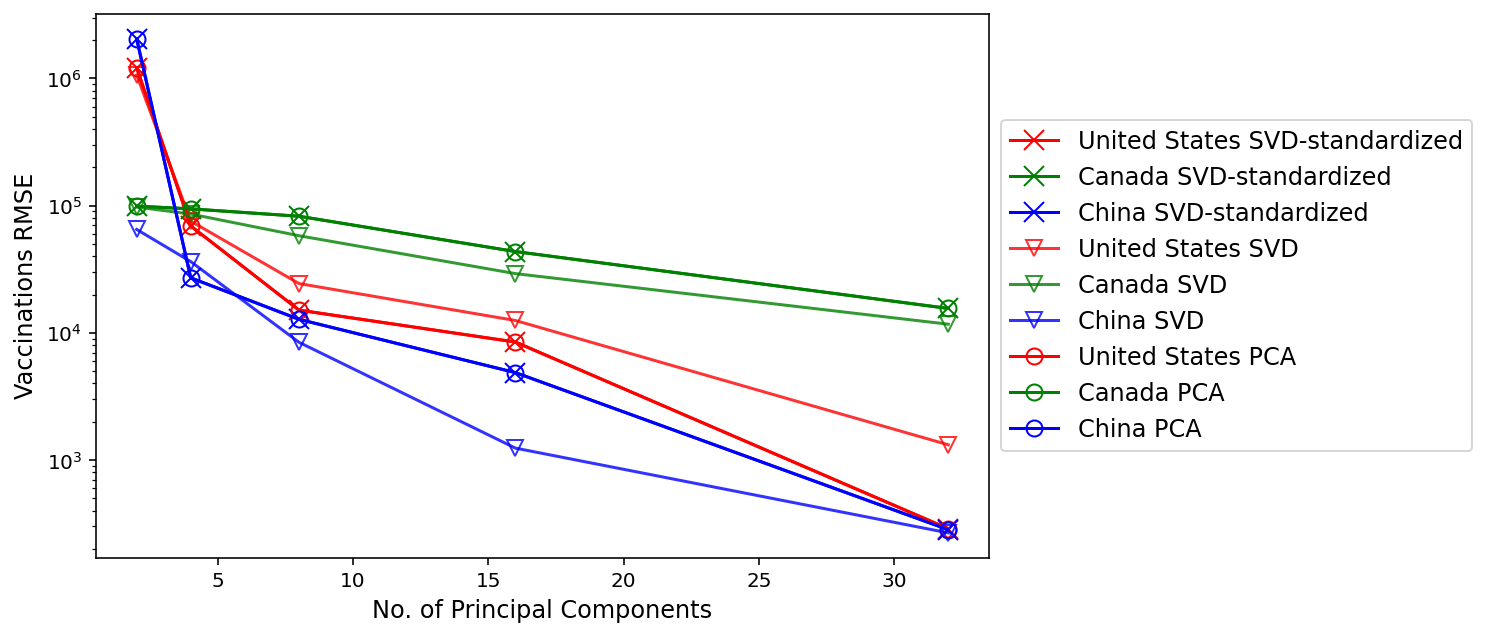

In [15]:
def pca_svd_comparison(rmse_pca, rmse_svd, rmse_svd_standardized, dataset_title):
  x = np.array([2, 4, 8, 16, 32])
  width = 1
  color = ['r', 'g', 'b']
  country = ['United States', 'Canada', 'China']
  data = ['SVD-standardized', 'SVD', 'PCA']

  fig = plt.figure(figsize=(8,5))
  for idx, country_rmse in enumerate(rmse_svd_standardized):
    plt.plot(x, 
            country_rmse,
            'x-', color=color[idx],
            alpha=1, fillstyle='none',
            markersize=10,
            label=country[idx]+' '+data[0])
  for idx, country_rmse in enumerate(rmse_svd):
    plt.plot(x,
            country_rmse,
            'v-', color=color[idx],
            alpha=0.8,
            fillstyle='none',
            markersize=8,
            label=country[idx]+' '+data[1])
  for idx, country_rmse in enumerate(rmse_pca):
    plt.plot(x,
            country_rmse,
            'o-',
            color=color[idx],
            fillstyle='none',
            markersize=8,
            label=country[idx]+' '+data[2])

    rmse_svd_standardized

  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
  plt.ylabel(dataset_title, size=12);
  plt.xlabel('No. of Principal Components', size=12);
  plt.yscale('log')

dataset_title = 'Vaccinations RMSE'
pca_svd_comparison(rmse_pca, rmse_svd, rmse_svd_standardized, dataset_title)


#### **Comments on Pre-Processing for SVD**
For the Singular Value Decompositon $U \Sigma V^T$, $U$ and $V^T$ are orthonormal matrices. Hence, strictly speaking, standardization of the original matrix $A$ is not necessary. Further, SVD is defined for both rectangualr and square matrices. Therefore, computation of the covariance matrix is not required unlike for PCA with Eigenvalue decomposition that we performed in part 3. 

The plots above ($\log$ plot) show the RMSE for United States, Canada and China obtained for a range of principal components obtained via:


1.   PCA for using Covariance Matrix (PCA)
2.   SVD for original dataset (SVD)
3.   SVD for standardized dataset (SVD-standardized)

For this dataset, we observe that SVD-standardized and PCA produce exactly same results whereas RMSE for SVD is slightly lower. It is interesting to note that, introducing standardization had a negative effect on the RMSE. This could be poentially due to the amplification of the noise in the dataset as a result of standardization. 



# Part 5: Let's collect another dataset!
Create another dataset similar to the one provided in your handout using the raw information on COVID deaths (not vaccinations) provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format (i.e., the same format that was in previous parts). You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. When analyzing Canada, you may use just Ontario. For China, you may use Beijing. **[1]**


Don't forget to add your new CSV file to Quercus for reference. The code below helps you to upload your new CSV file to your colab session. 

In [16]:
# The CSV file is fetched from a GitHub repository
covid_deaths_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/sacrover/PCA/main/Covid_Deaths.csv',
    index_col=0)

### CoVID Deaths: PCA using Eigenvalue Decomposition 

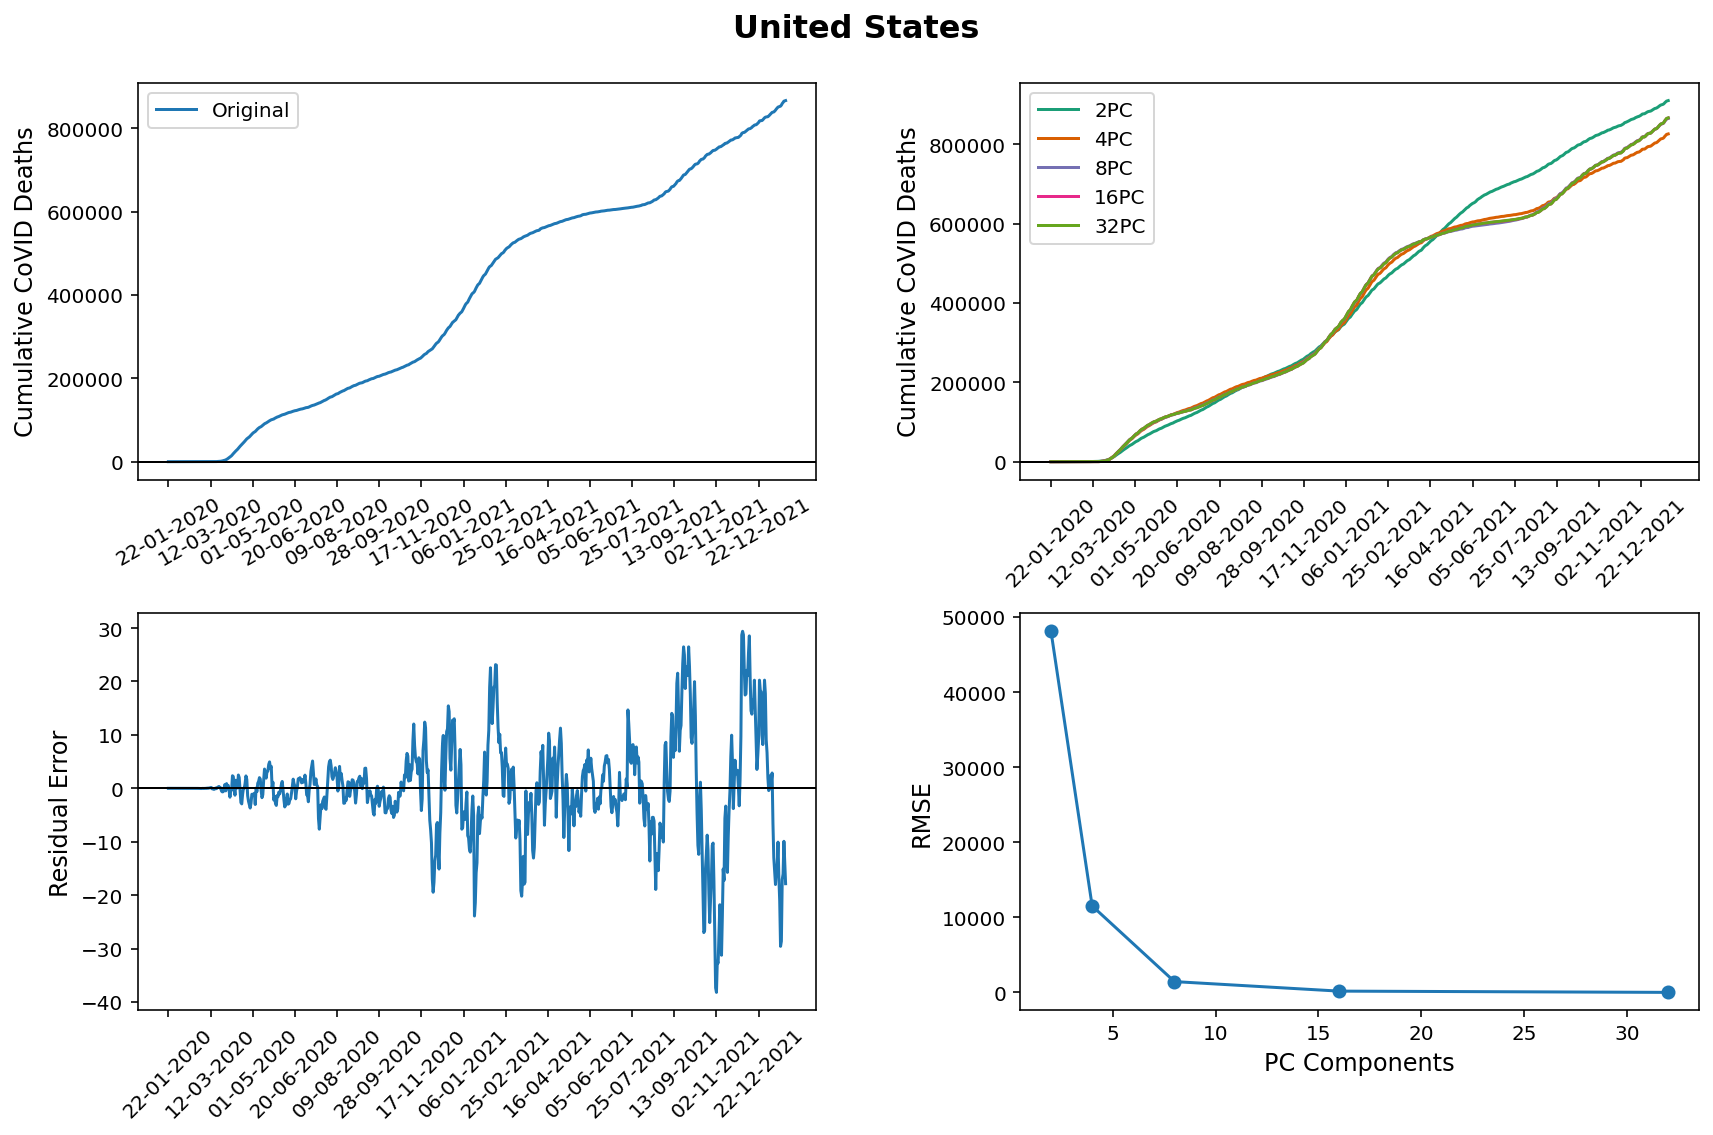

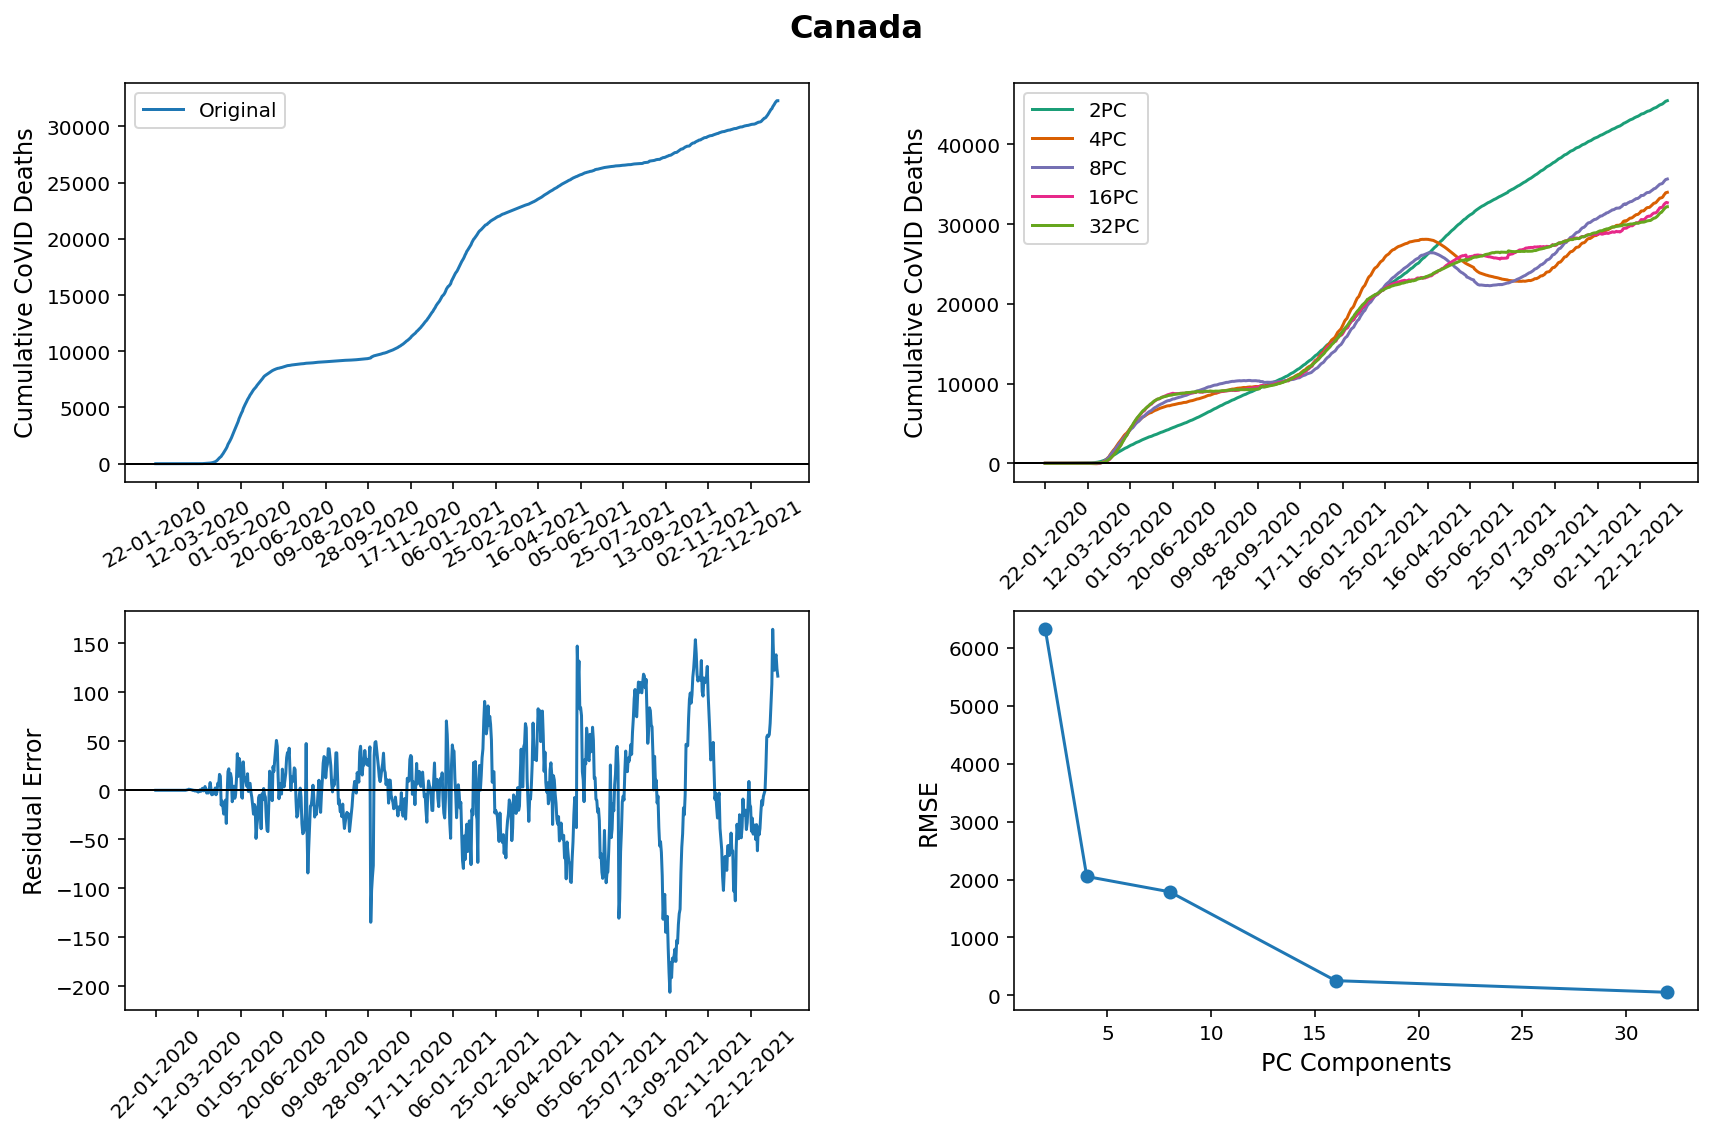

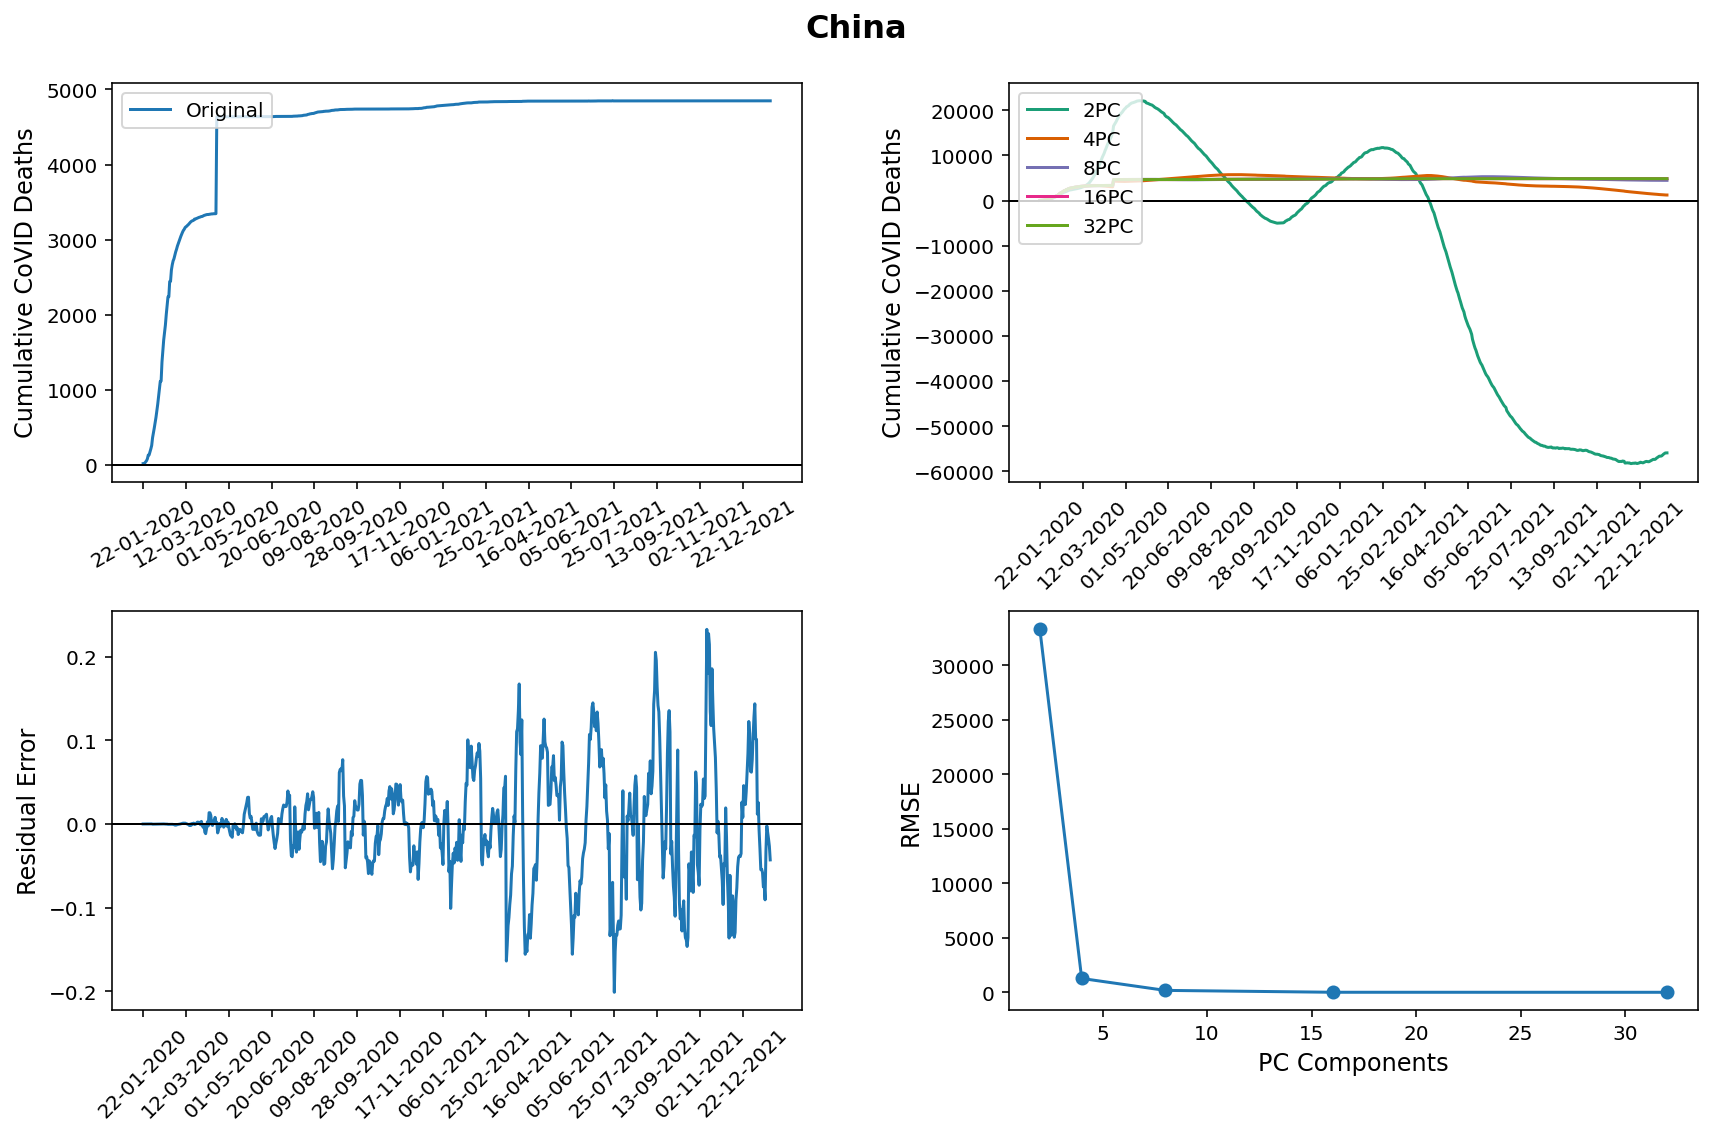

In [17]:

rmse_us_death_pca = plot_country_figures_pca(original_df=covid_deaths_raw,
                                         country_name='United States',
                                         dataset_name='Cumulative CoVID Deaths')
rmse_cd_death_pca = plot_country_figures_pca(original_df=covid_deaths_raw,
                                         country_name='Canada',
                                          dataset_name='Cumulative CoVID Deaths')
rmse_ch_death_pca = plot_country_figures_pca(original_df=covid_deaths_raw,
                                         country_name='China',
                                          dataset_name='Cumulative CoVID Deaths')

rmse_pca = [rmse_us_death_pca, rmse_cd_death_pca, rmse_ch_death_pca]

### CoVID Deaths: PCA using Singular Value Decomposition (No Standardization)

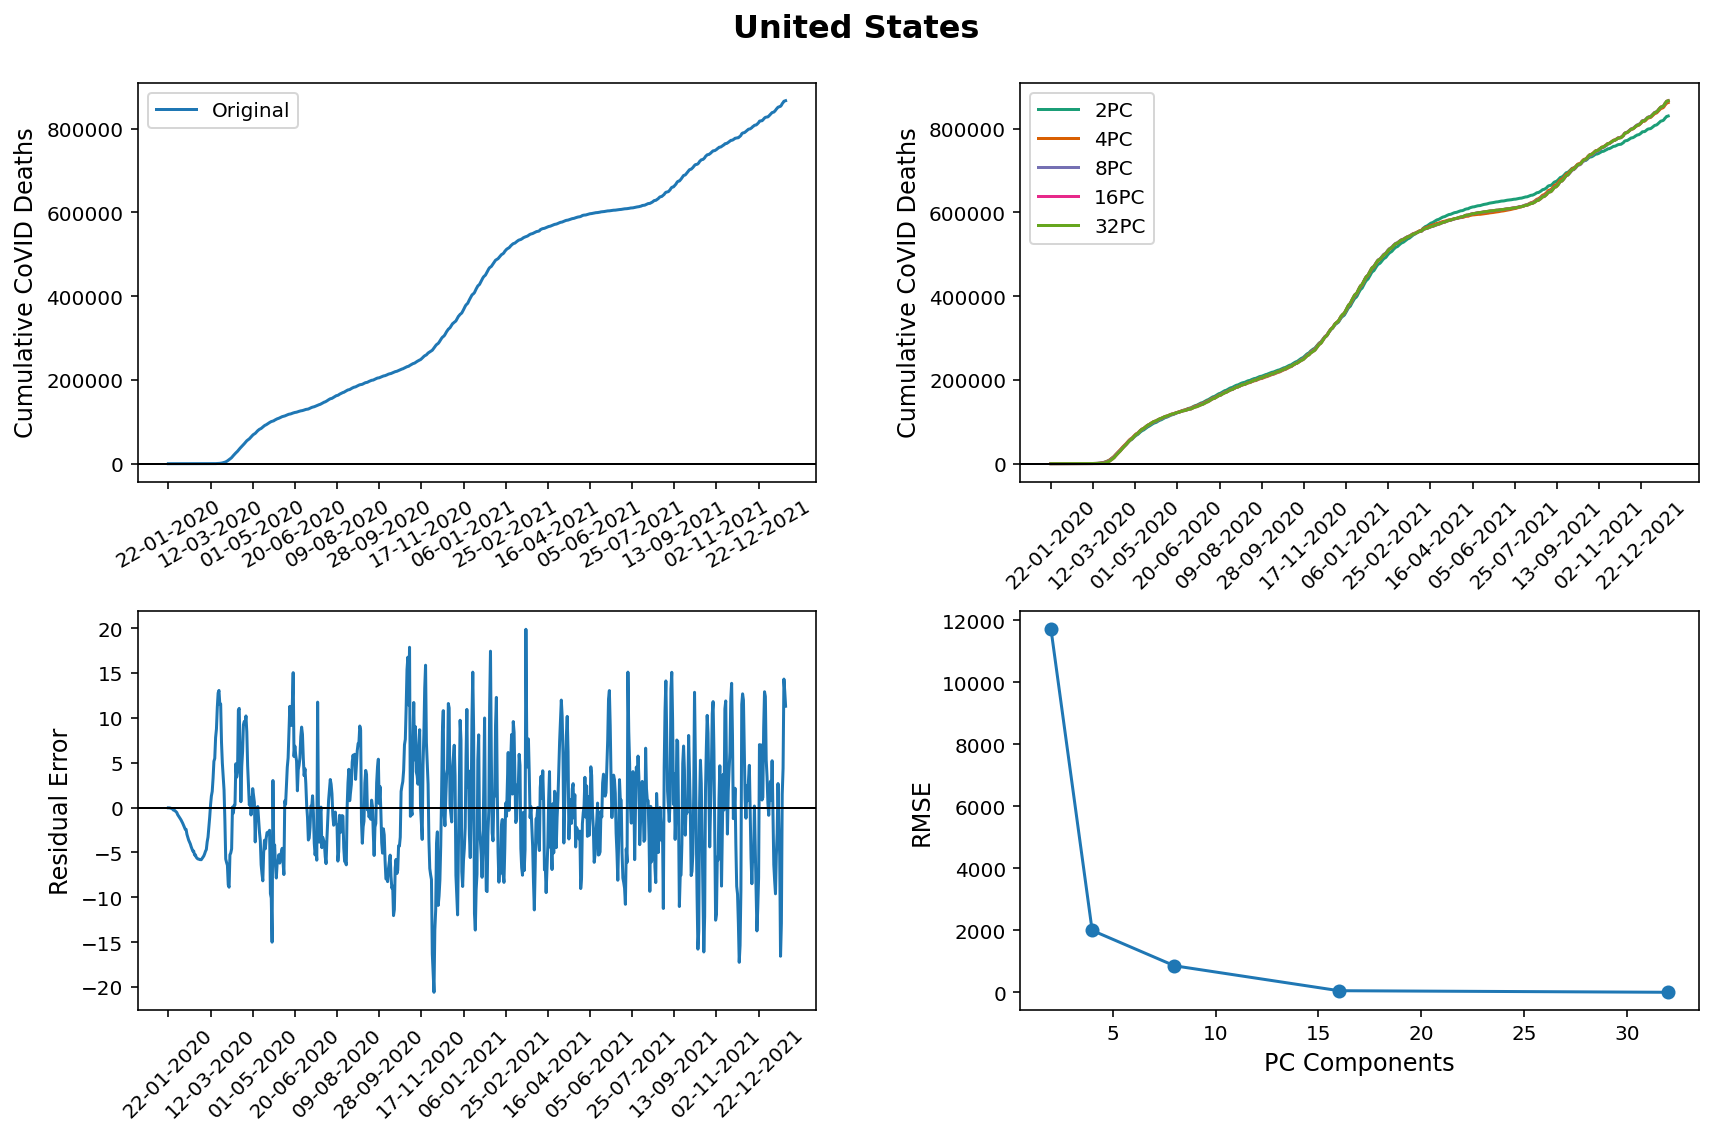

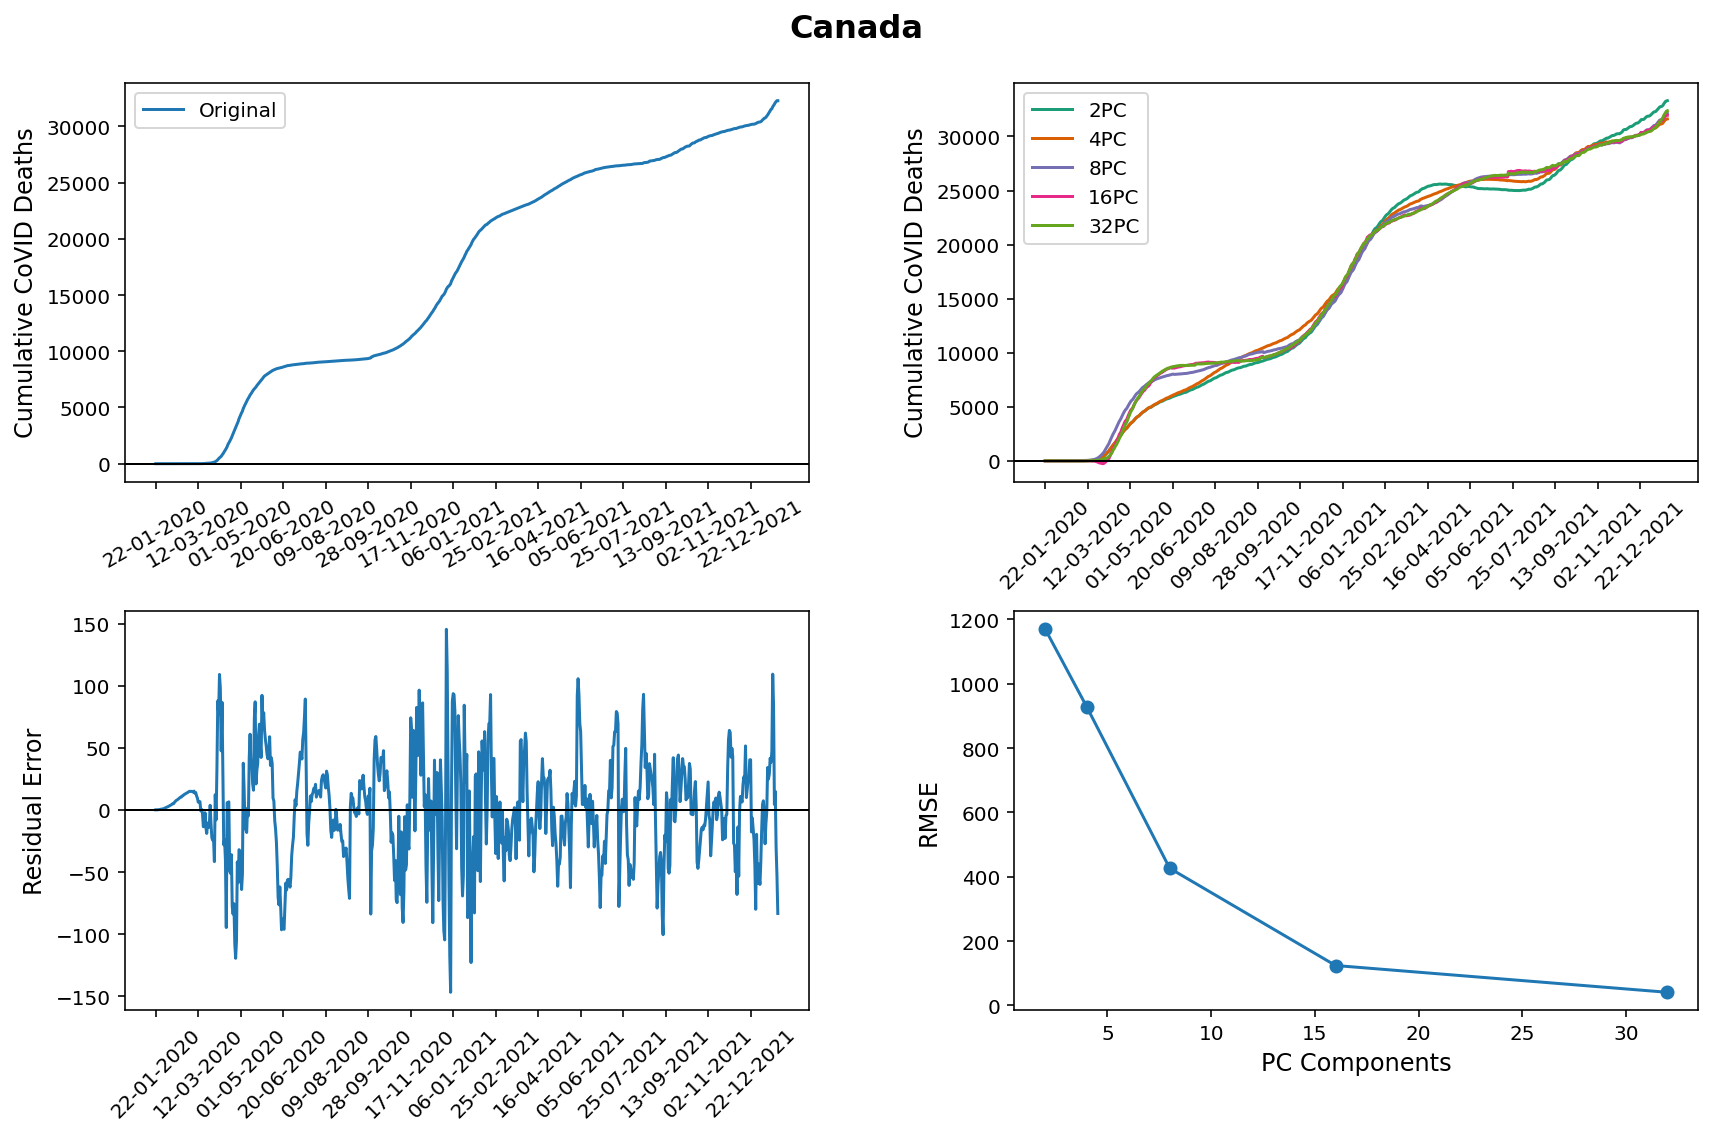

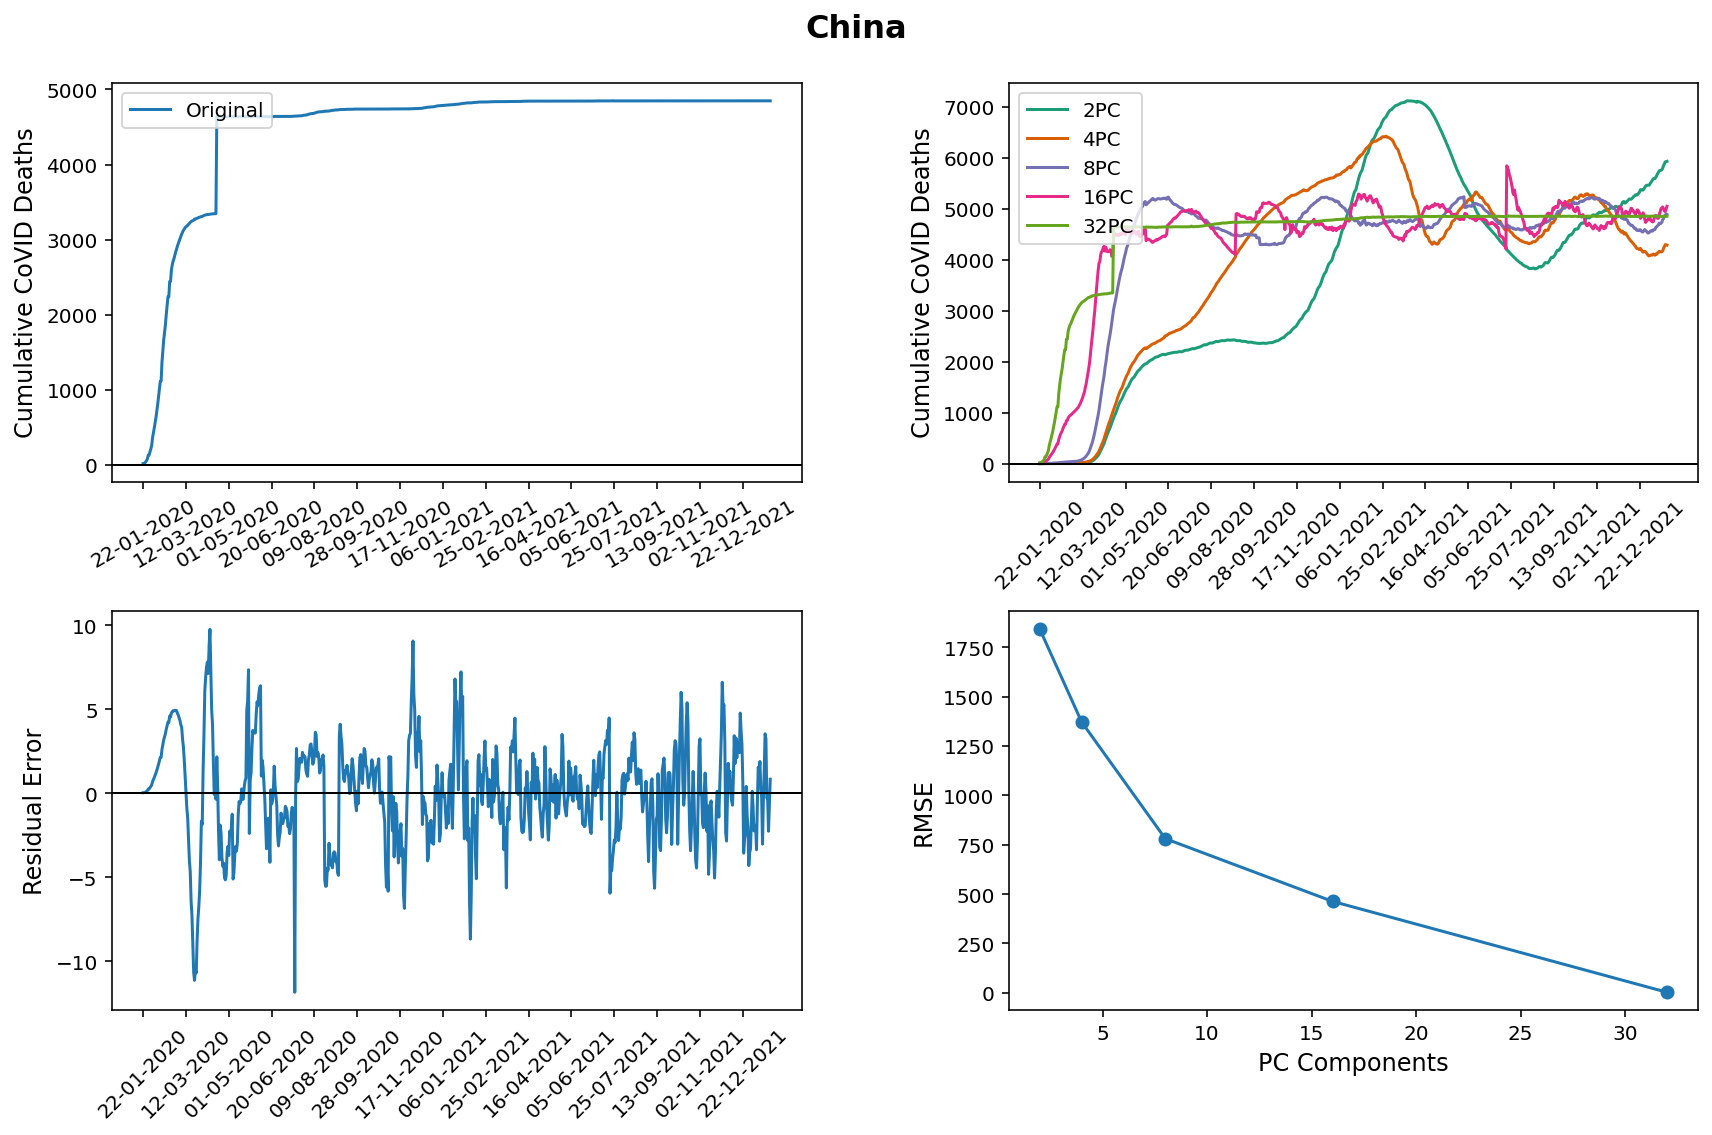

In [18]:
rmse_us_death_svd = plot_country_figures_svd(original_df=covid_deaths_raw,
                                         country_name='United States',
                                         dataset_name='Cumulative CoVID Deaths',
                                         standardize=False)
rmse_cd_death_svd = plot_country_figures_svd(original_df=covid_deaths_raw,
                                         country_name='Canada',
                                          dataset_name='Cumulative CoVID Deaths',
                                          standardize=False)
rmse_ch_death_svd = plot_country_figures_svd(original_df=covid_deaths_raw,
                                         country_name='China',
                                          dataset_name='Cumulative CoVID Deaths',
                                          standardize=False)
rmse_svd = [rmse_us_death_svd, rmse_cd_death_svd, rmse_ch_death_svd]

### CoVID Deaths: PCA using Singular Value Decomposition (With Standardization)

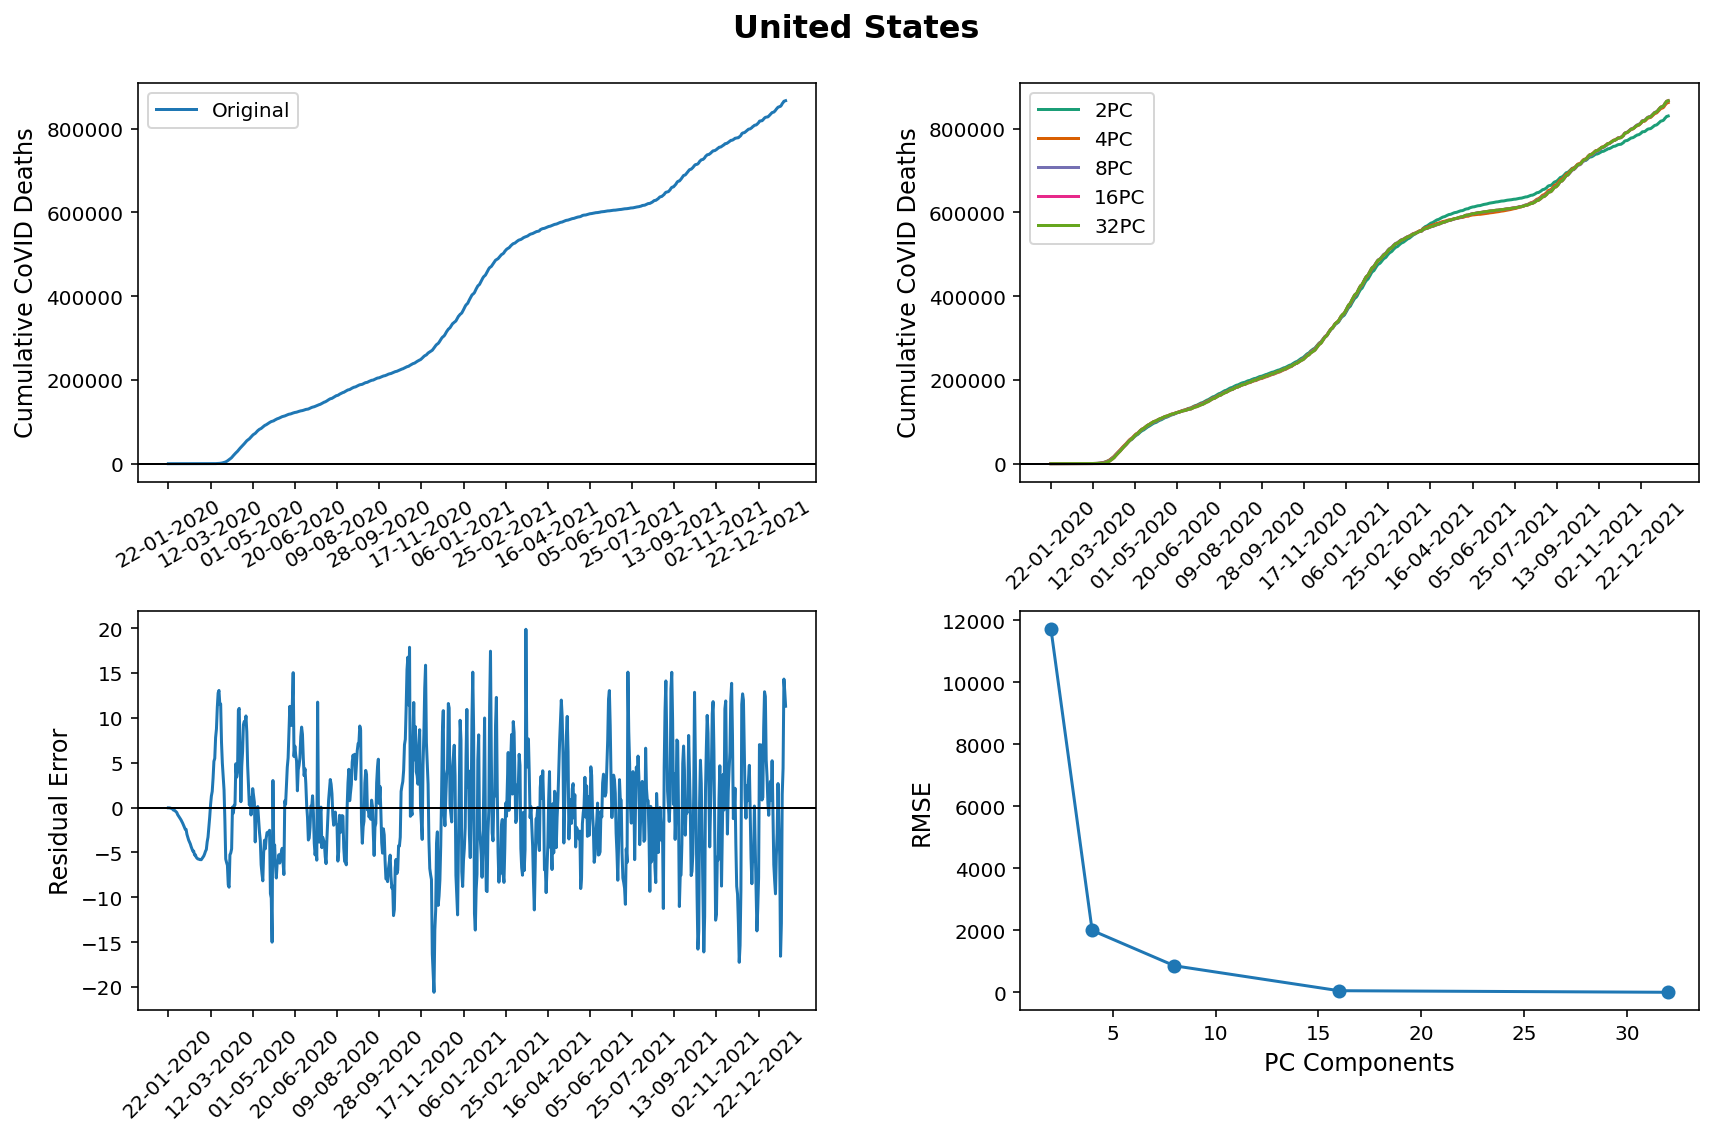

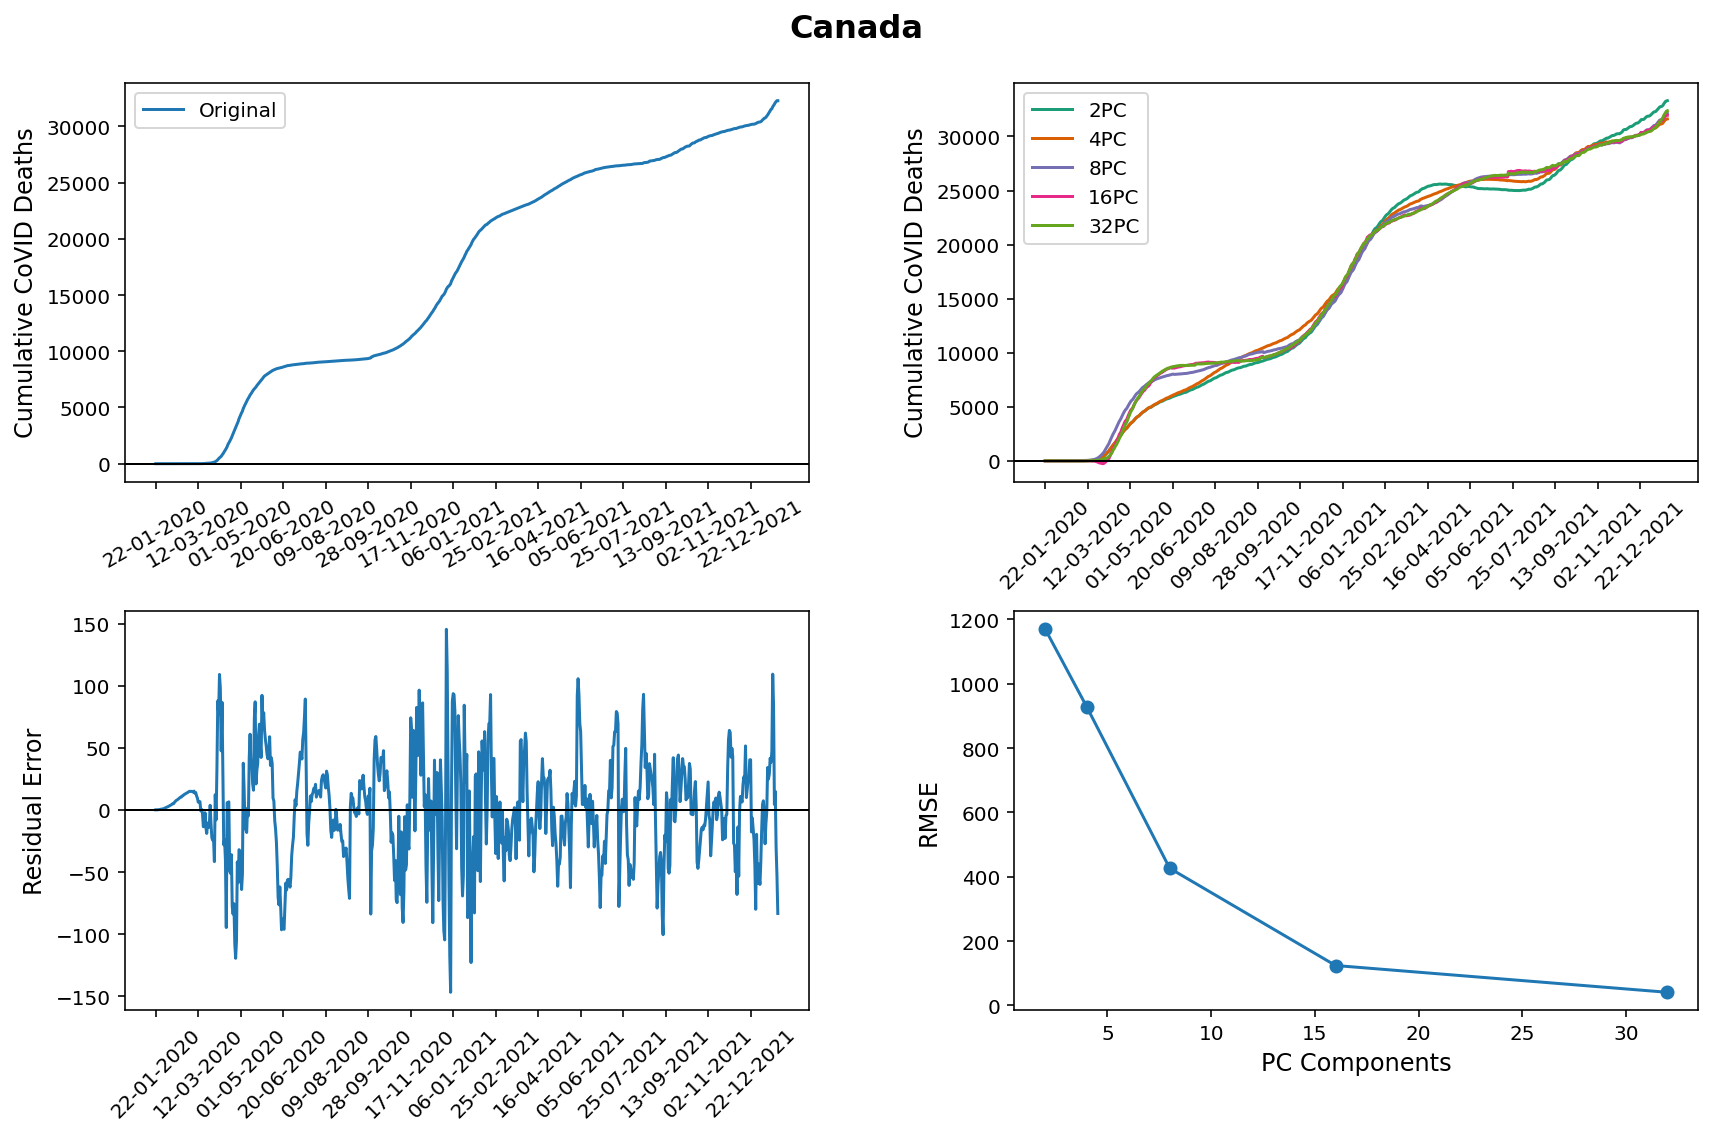

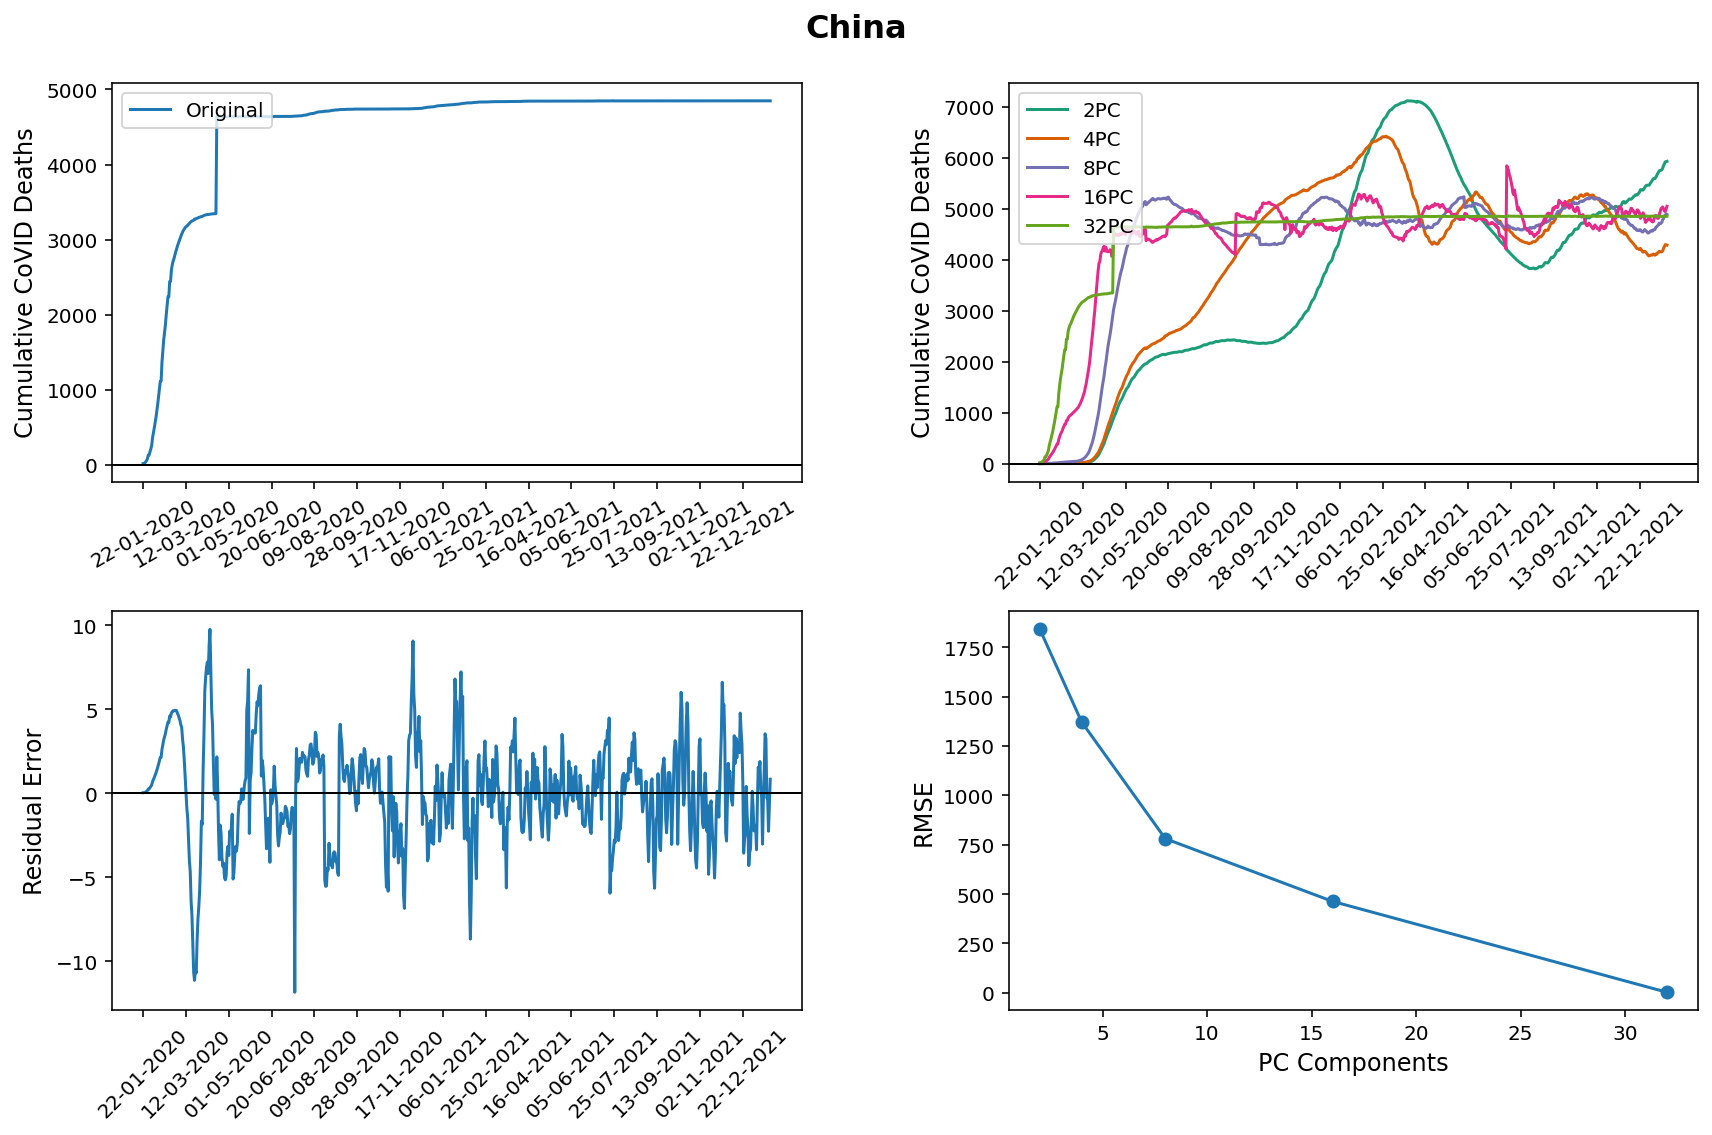

In [19]:
rmse_us_death_svd_standardized = plot_country_figures_svd(original_df=covid_deaths_raw,
                                         country_name='United States',
                                         dataset_name='Cumulative CoVID Deaths',
                                         standardize=False)
rmse_cd_death_svd_standardized = plot_country_figures_svd(original_df=covid_deaths_raw,
                                         country_name='Canada',
                                          dataset_name='Cumulative CoVID Deaths',
                                          standardize=False)
rmse_ch_death_svd_standardized = plot_country_figures_svd(original_df=covid_deaths_raw,
                                         country_name='China',
                                          dataset_name='Cumulative CoVID Deaths',
                                          standardize=False)
rmse_svd_standardized = [rmse_us_death_svd_standardized,
                         rmse_cd_death_svd_standardized,
                         rmse_ch_death_svd_standardized]

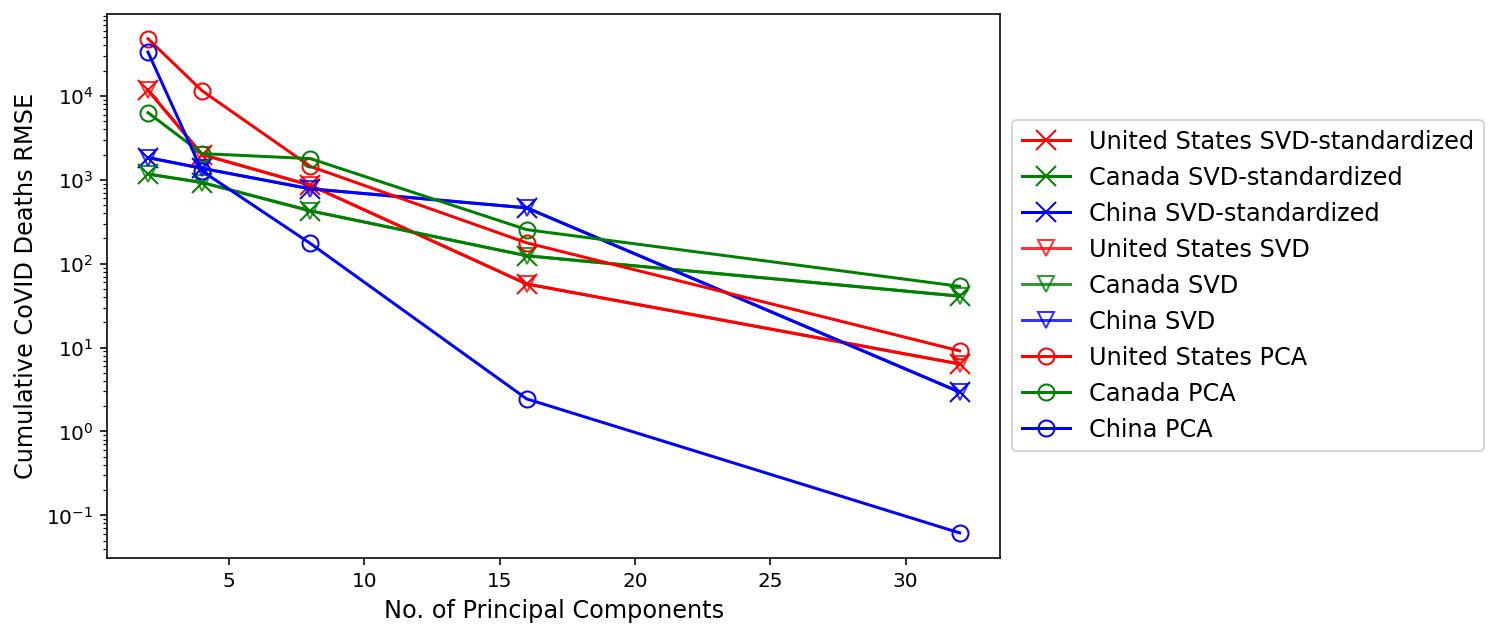

In [20]:
dataset_title = 'Cumulative CoVID Deaths RMSE'
pca_svd_comparison(rmse_pca, rmse_svd, rmse_svd_standardized, dataset_title)

**NOTE** : THe CoVID death dataset has far less noise than the vaccination dataset, and its effect can be seen on how the stadardization has close to no effect on SVD. 

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

